In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
berlin = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Berlin (November 2015).csv',
                   encoding='utf8')

In [3]:
berlin.drop('borough', axis=1, inplace=True)

In [4]:
berlin.neighborhood.replace(u'Tempelhof-Sch\ufffdneberg',u'Tempelhof-Schoeneberg',inplace=True)
berlin.neighborhood.replace(u'Neuk\ufffdlln',u'Neukolln',inplace=True)
berlin.neighborhood.replace(u'Treptow-K\ufffdpenick',u'Treptow-Koepenick',inplace=True)

In [5]:
berlin = berlin[berlin['room_type'].notnull()]

In [6]:
berlin = berlin.reset_index()

In [7]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14913 entries, 0 to 14912
Data columns (total 16 columns):
index                   14913 non-null int64
Unnamed: 0              14913 non-null int64
room_id                 14913 non-null int64
host_id                 14912 non-null float64
room_type               14913 non-null object
neighborhood            14913 non-null object
reviews                 14913 non-null int64
overall_satisfaction    11837 non-null float64
accommodates            13701 non-null float64
bedrooms                14872 non-null float64
bathrooms               13804 non-null float64
price                   14913 non-null float64
minstay                 14487 non-null float64
latitude                14913 non-null float64
longitude               14913 non-null float64
collected               14913 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 1.8+ MB


In [8]:
berlin.bedrooms.isnull().sum()

41

In [9]:
berlin= berlin[berlin['bedrooms'].notnull()]

In [10]:
berlin.bathrooms[berlin.bathrooms==0].value_counts()

0.0    75
Name: bathrooms, dtype: int64

In [11]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
berlin = berlin[berlin['bathrooms'] != 0.]

In [12]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14797 entries, 0 to 14912
Data columns (total 16 columns):
index                   14797 non-null int64
Unnamed: 0              14797 non-null int64
room_id                 14797 non-null int64
host_id                 14796 non-null float64
room_type               14797 non-null object
neighborhood            14797 non-null object
reviews                 14797 non-null int64
overall_satisfaction    11740 non-null float64
accommodates            13596 non-null float64
bedrooms                14797 non-null float64
bathrooms               13691 non-null float64
price                   14797 non-null float64
minstay                 14372 non-null float64
latitude                14797 non-null float64
longitude               14797 non-null float64
collected               14797 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 1.9+ MB


In [13]:
be = berlin[['bedrooms','bathrooms']]

In [14]:
be.sort_values('bedrooms', inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
be.head(2)

,bedrooms,bathrooms
5009,0.0,1.0
6359,0.0,1.0


In [16]:
berlin.sort_values('bedrooms', inplace=True)

In [17]:
berlin = berlin.reset_index()

In [18]:
berlin.head(2)

,level_0,index,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,5009,5013,5013,2697809,1301493.0,Entire home/apt,Pankow,48,4.5,2.0,0.0,1.0,53.0,1.0,52.553883,13.402012,2015-11-30 23:33:42.739319
1,6359,6364,6364,3948713,20465485.0,Entire home/apt,Friedrichshain-Kreuzberg,32,4.5,3.0,0.0,1.0,55.0,3.0,52.496957,13.434735,2015-12-01 01:03:36.324474


In [19]:
berlin.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [20]:
berlin.head(2)

,level_0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,5009,2697809,1301493.0,Entire home/apt,Pankow,48,4.5,2.0,0.0,1.0,53.0,1.0,52.553883,13.402012,2015-11-30 23:33:42.739319
1,6359,3948713,20465485.0,Entire home/apt,Friedrichshain-Kreuzberg,32,4.5,3.0,0.0,1.0,55.0,3.0,52.496957,13.434735,2015-12-01 01:03:36.324474


In [21]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 15 columns):
level_0                 14797 non-null int64
room_id                 14797 non-null int64
host_id                 14796 non-null float64
room_type               14797 non-null object
neighborhood            14797 non-null object
reviews                 14797 non-null int64
overall_satisfaction    11740 non-null float64
accommodates            13596 non-null float64
bedrooms                14797 non-null float64
bathrooms               13691 non-null float64
price                   14797 non-null float64
minstay                 14372 non-null float64
latitude                14797 non-null float64
longitude               14797 non-null float64
collected               14797 non-null object
dtypes: float64(9), int64(3), object(3)
memory usage: 1.7+ MB


In [22]:
#berlin['bathrooms'][berlin['bedrooms']==0.]

In [23]:
# Imputation for Bathrooms
berlin.bathrooms.fillna(method='bfill',inplace=True)


In [24]:
#berlin.info()

In [25]:
#paris.bathrooms[paris.bedrooms==3]

In [26]:
berlin['overall_satisfaction'].isnull().sum()

3057

In [27]:
# maximum number of reviews for a place where satisfaction level is null is 6(very small), we impute the 
# satisfaction level with a score of 2.
berlin['reviews'][berlin['overall_satisfaction'].isnull()].value_counts()

0    2883
1     152
2      19
3       2
4       1
Name: reviews, dtype: int64

In [28]:
# Imputation for overall satisfaction
berlin.overall_satisfaction.fillna(value =2. ,inplace=True)


In [29]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 15 columns):
level_0                 14797 non-null int64
room_id                 14797 non-null int64
host_id                 14796 non-null float64
room_type               14797 non-null object
neighborhood            14797 non-null object
reviews                 14797 non-null int64
overall_satisfaction    14797 non-null float64
accommodates            13596 non-null float64
bedrooms                14797 non-null float64
bathrooms               14797 non-null float64
price                   14797 non-null float64
minstay                 14372 non-null float64
latitude                14797 non-null float64
longitude               14797 non-null float64
collected               14797 non-null object
dtypes: float64(9), int64(3), object(3)
memory usage: 1.7+ MB


In [30]:
berlin['room_type'][berlin['minstay'].isnull()].value_counts()

Entire home/apt    354
Private room        69
Shared room          2
Name: room_type, dtype: int64

In [31]:
berlin['minstay'] = berlin.groupby('bedrooms').minstay.transform(lambda x: x.replace(np.nan, 2))


In [32]:
berlin['bhk'] = berlin.bedrooms.map(lambda x: 1. if x == 0. else x)

In [33]:
berlin.head(2)

,level_0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected,bhk
0,5009,2697809,1301493.0,Entire home/apt,Pankow,48,4.5,2.0,0.0,1.0,53.0,1.0,52.553883,13.402012,2015-11-30 23:33:42.739319,1.0
1,6359,3948713,20465485.0,Entire home/apt,Friedrichshain-Kreuzberg,32,4.5,3.0,0.0,1.0,55.0,3.0,52.496957,13.434735,2015-12-01 01:03:36.324474,1.0


In [34]:
berlin.drop(['level_0'], axis=1, inplace=True)

In [35]:
#berlin.info()

In [36]:
berlin.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected,bhk
0,2697809,1301493.0,Entire home/apt,Pankow,48,4.5,2.0,0.0,1.0,53.0,1.0,52.553883,13.402012,2015-11-30 23:33:42.739319,1.0
1,3948713,20465485.0,Entire home/apt,Friedrichshain-Kreuzberg,32,4.5,3.0,0.0,1.0,55.0,3.0,52.496957,13.434735,2015-12-01 01:03:36.324474,1.0


In [101]:
#berlin.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_Clean.csv')

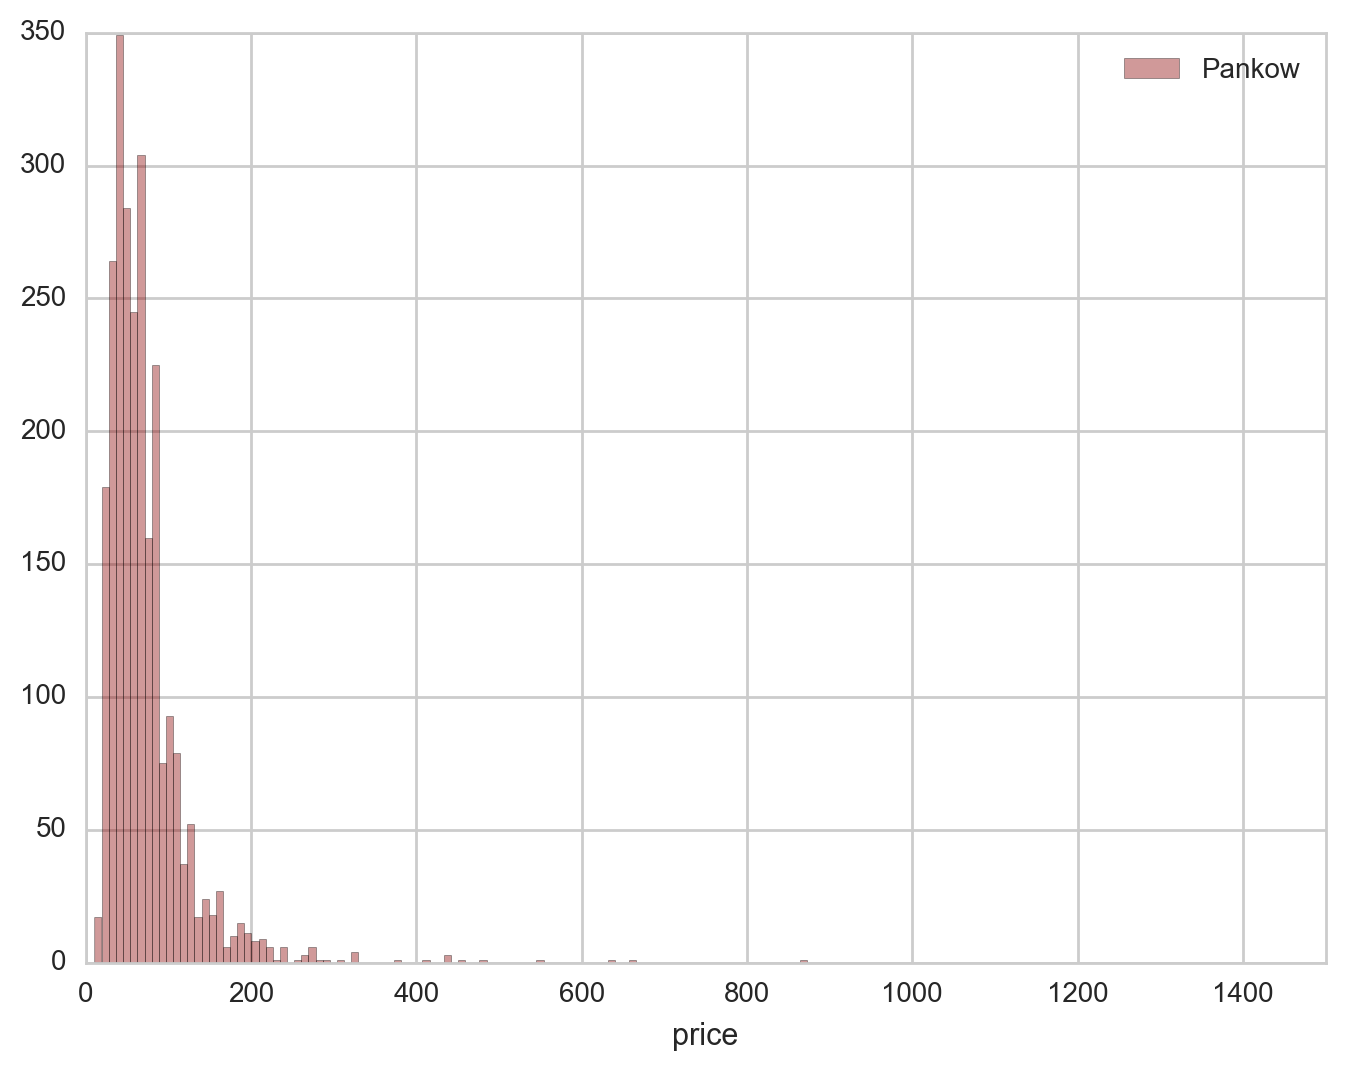

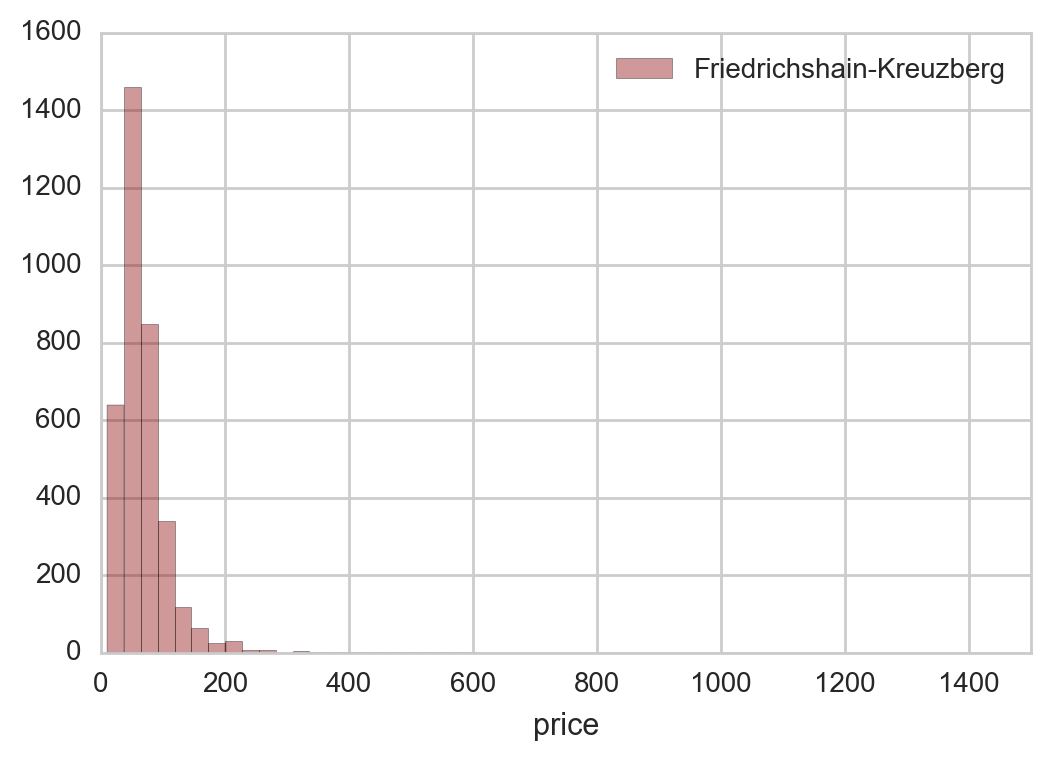

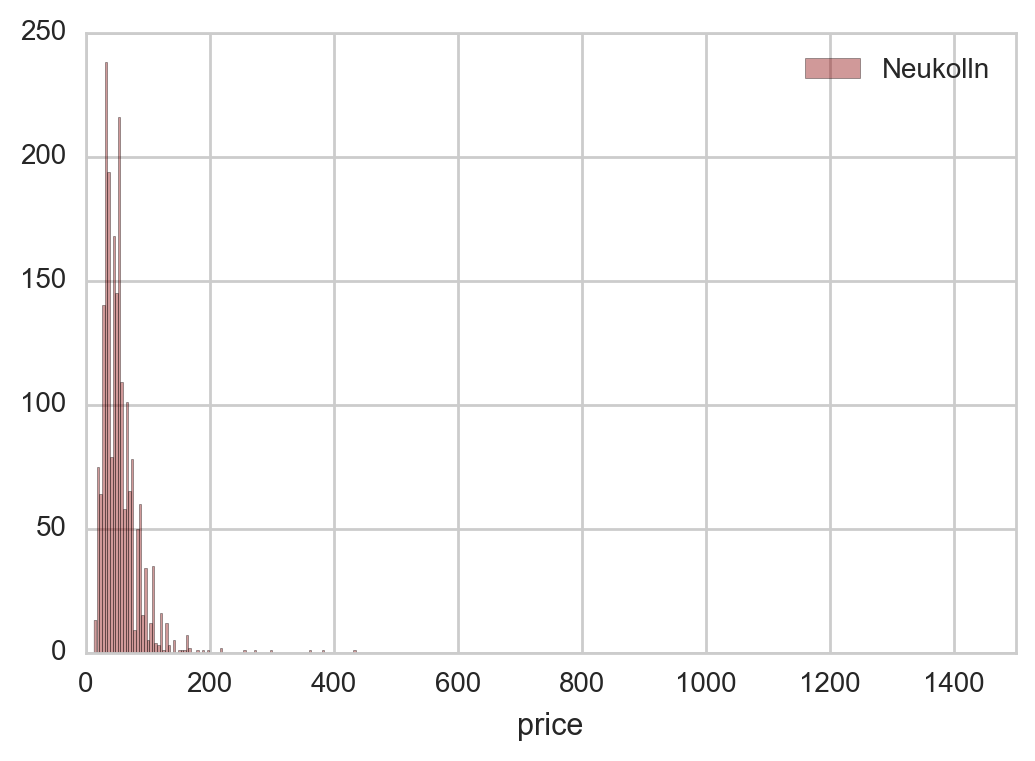

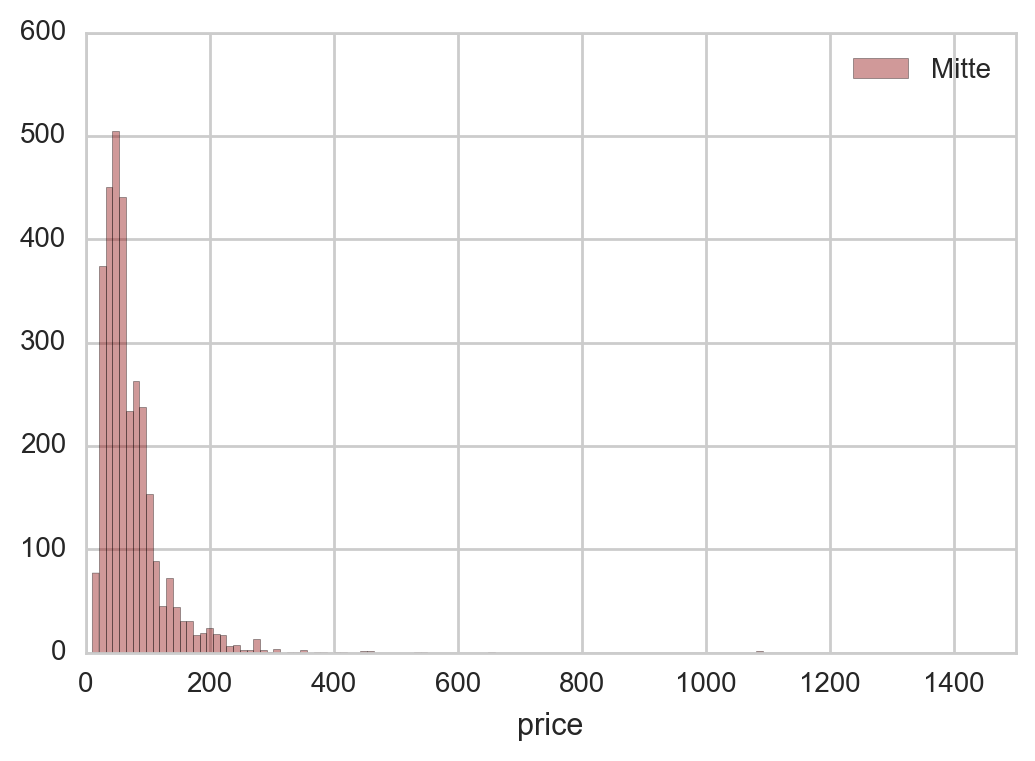

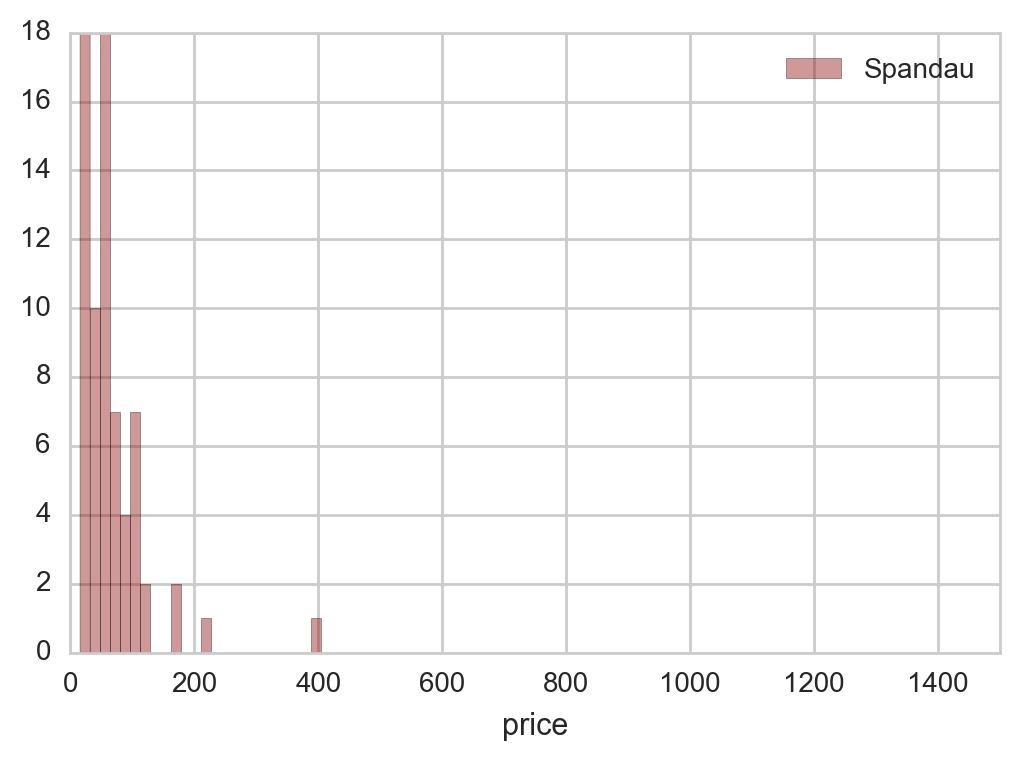

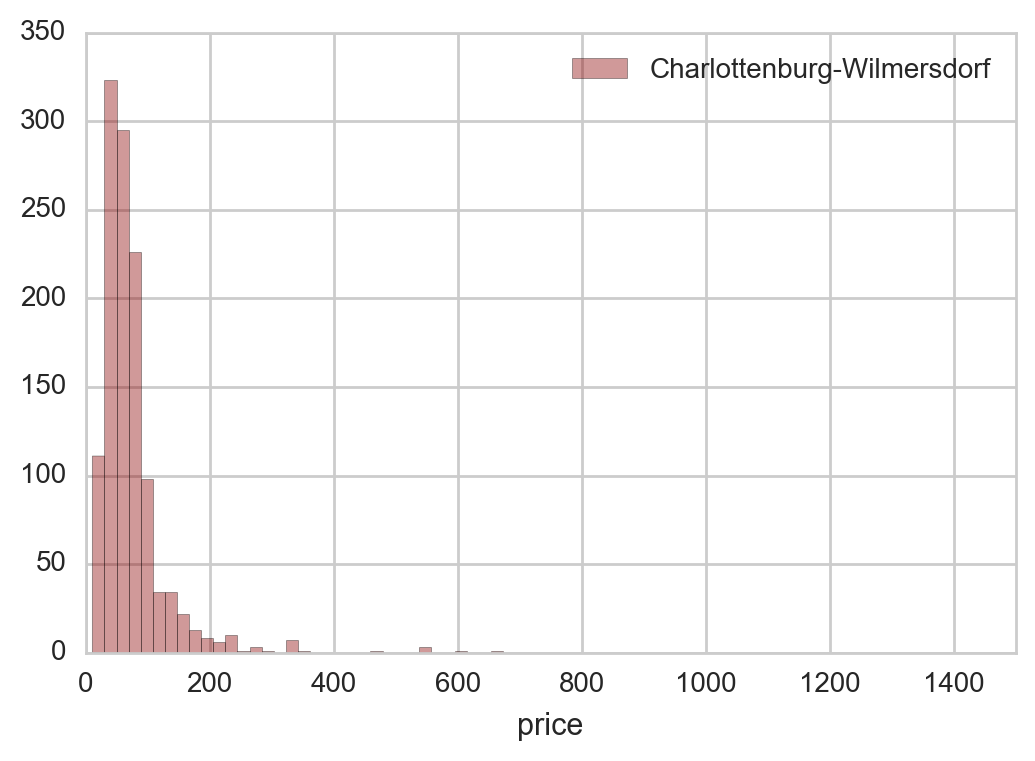

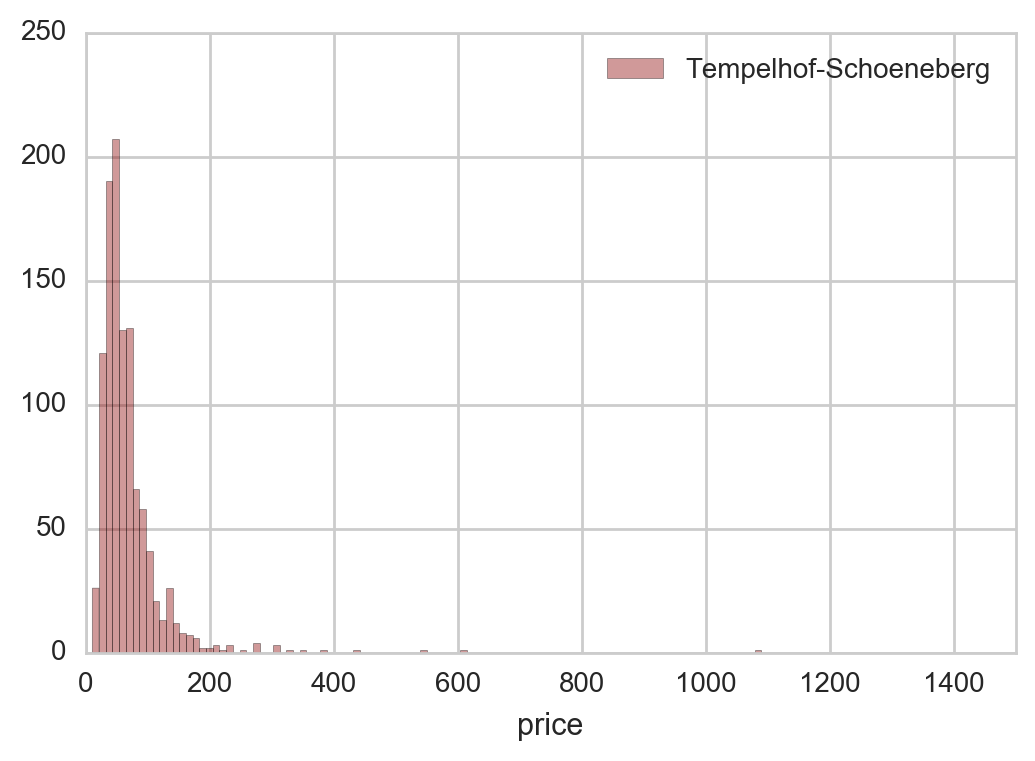

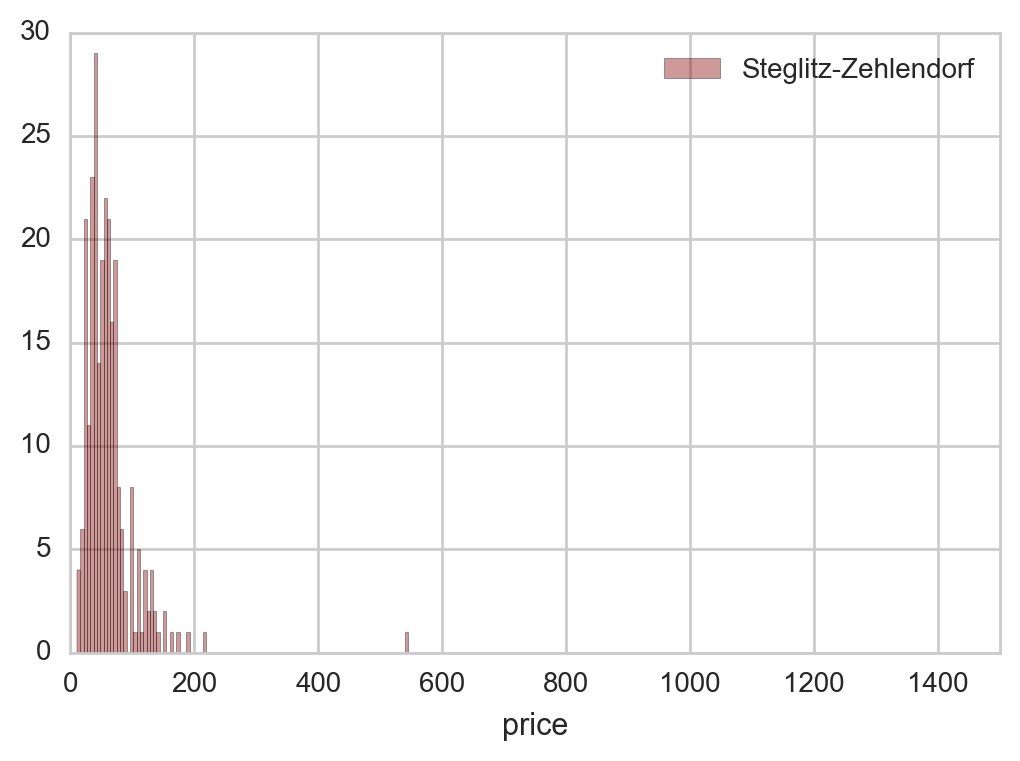

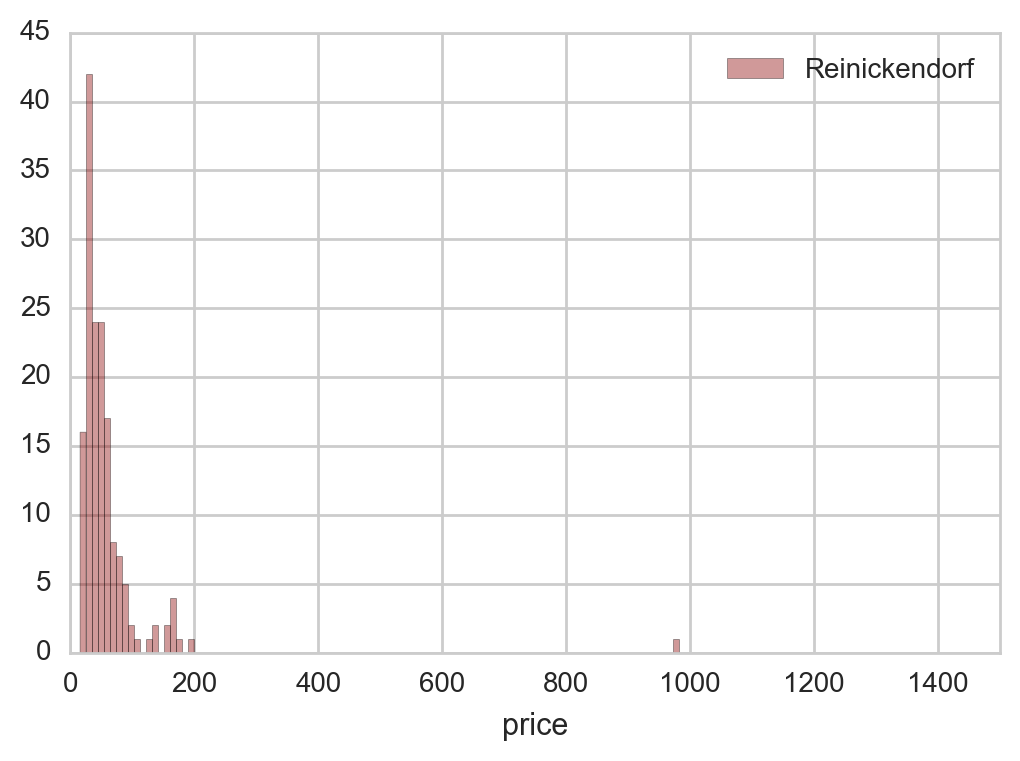

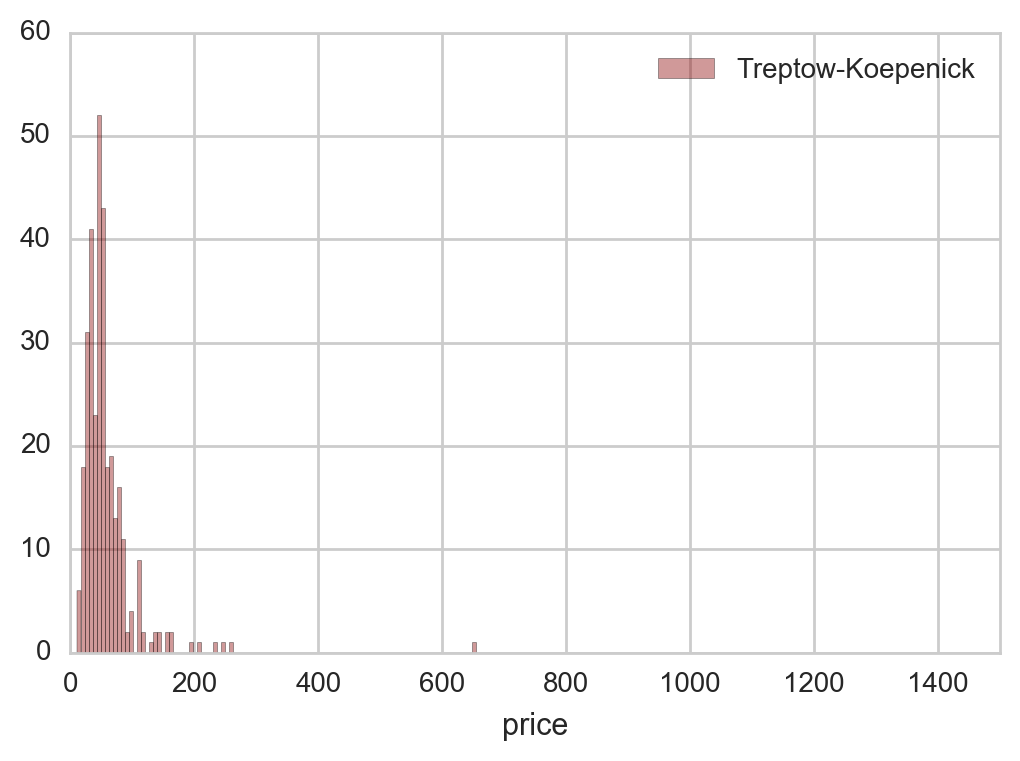

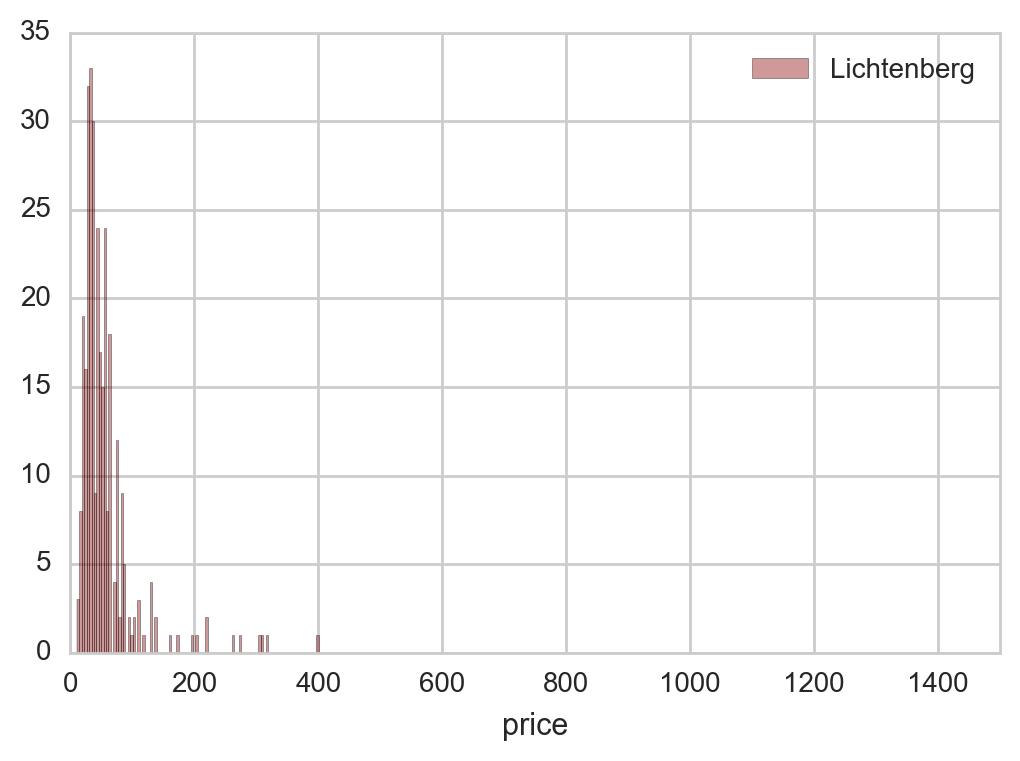

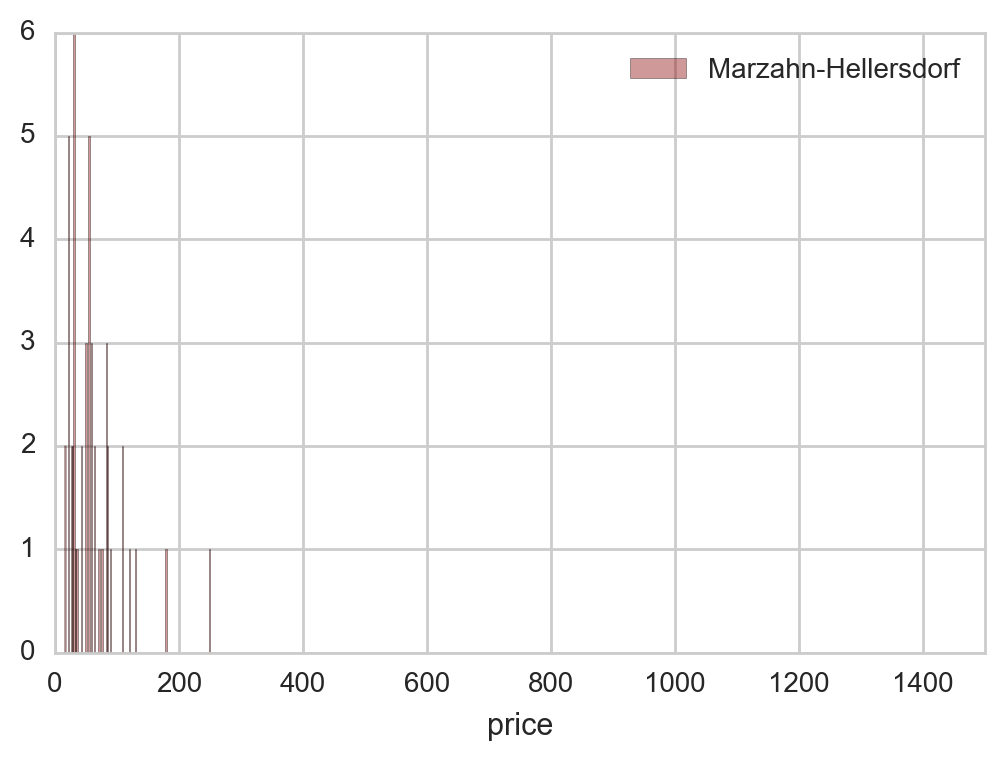

In [65]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(berlin.neighborhood.unique())):
    be = berlin[berlin.neighborhood == berlin.neighborhood.unique()[i]]
    
    ax = sns.distplot(be.price, color='darkred', bins=100, kde=False, 
                      label = berlin.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    ax.set_xlim([0, 1500])
    plt.show()

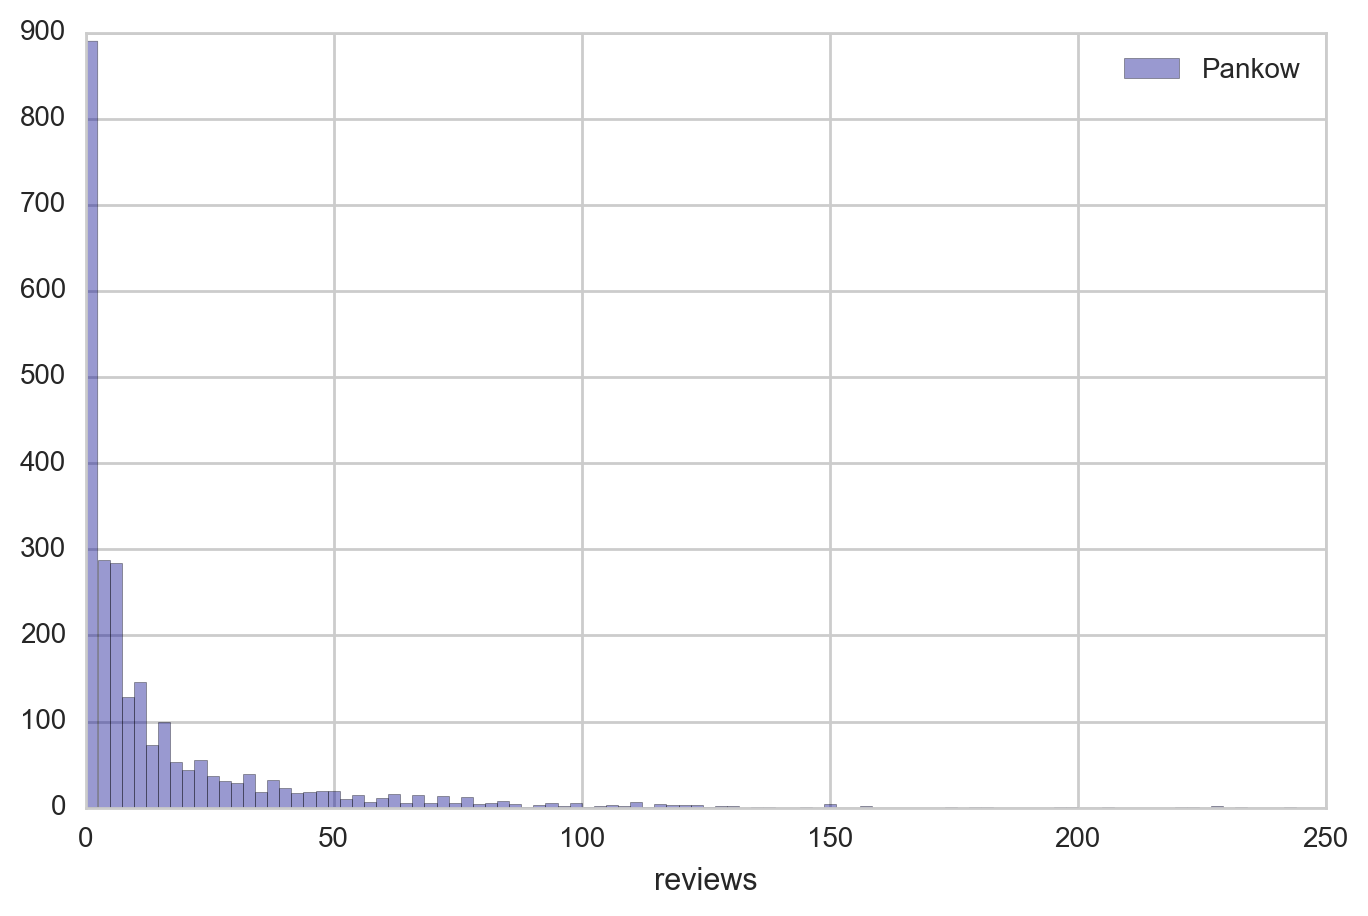

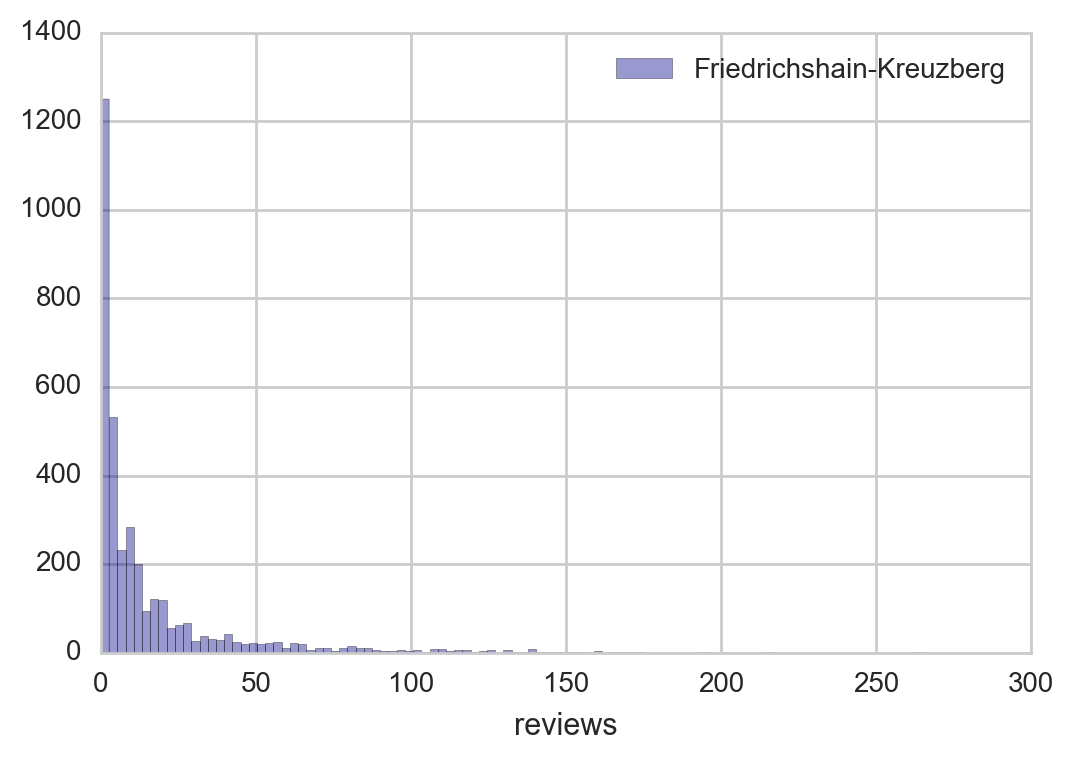

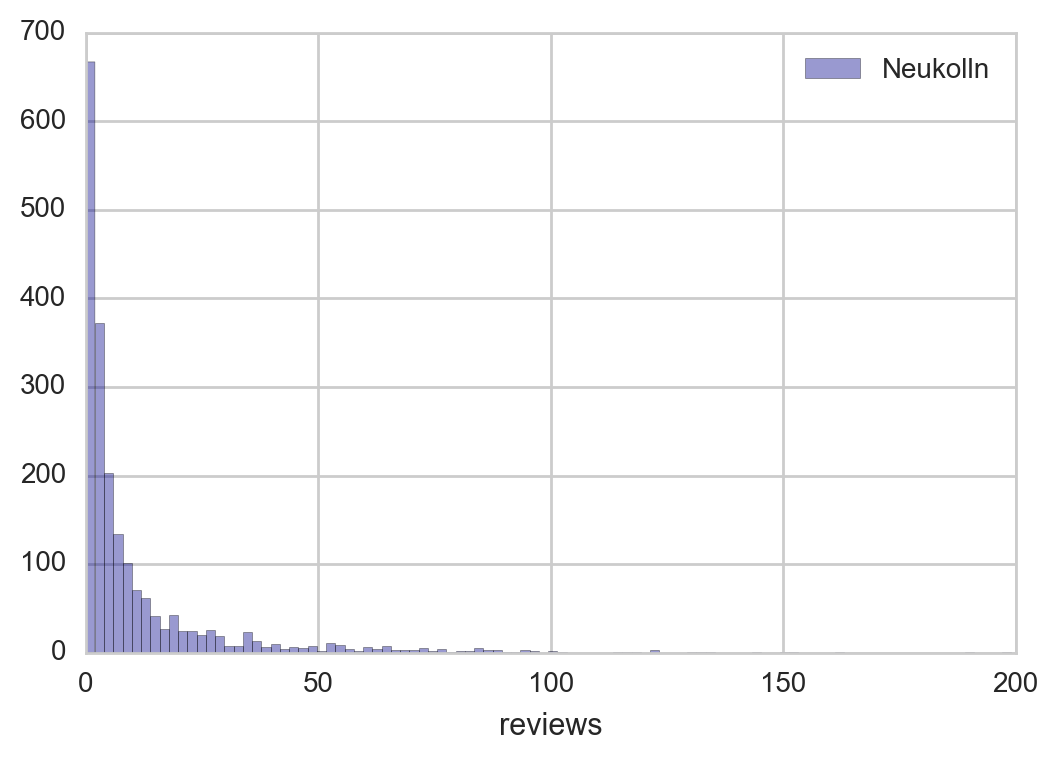

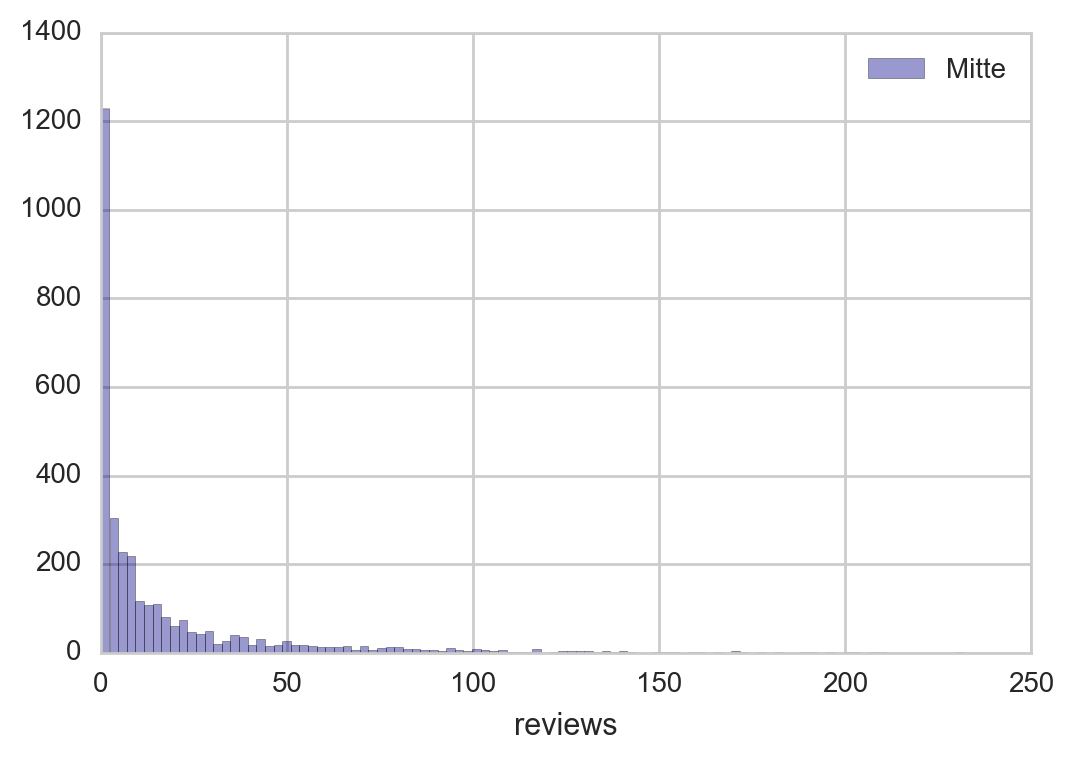

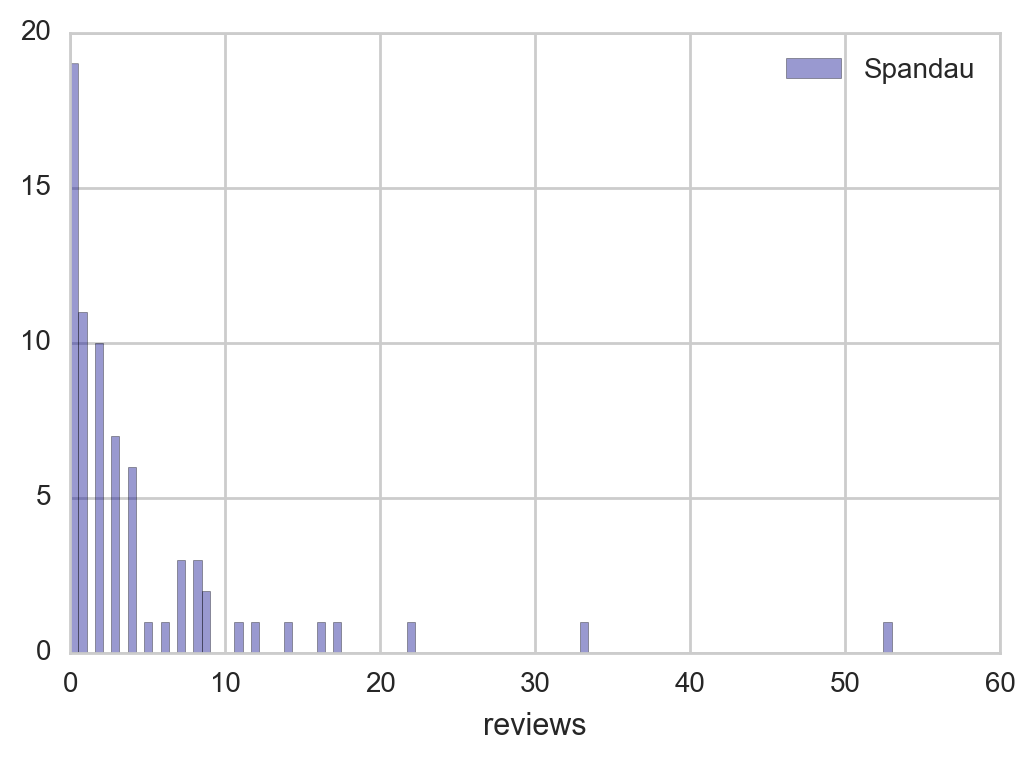

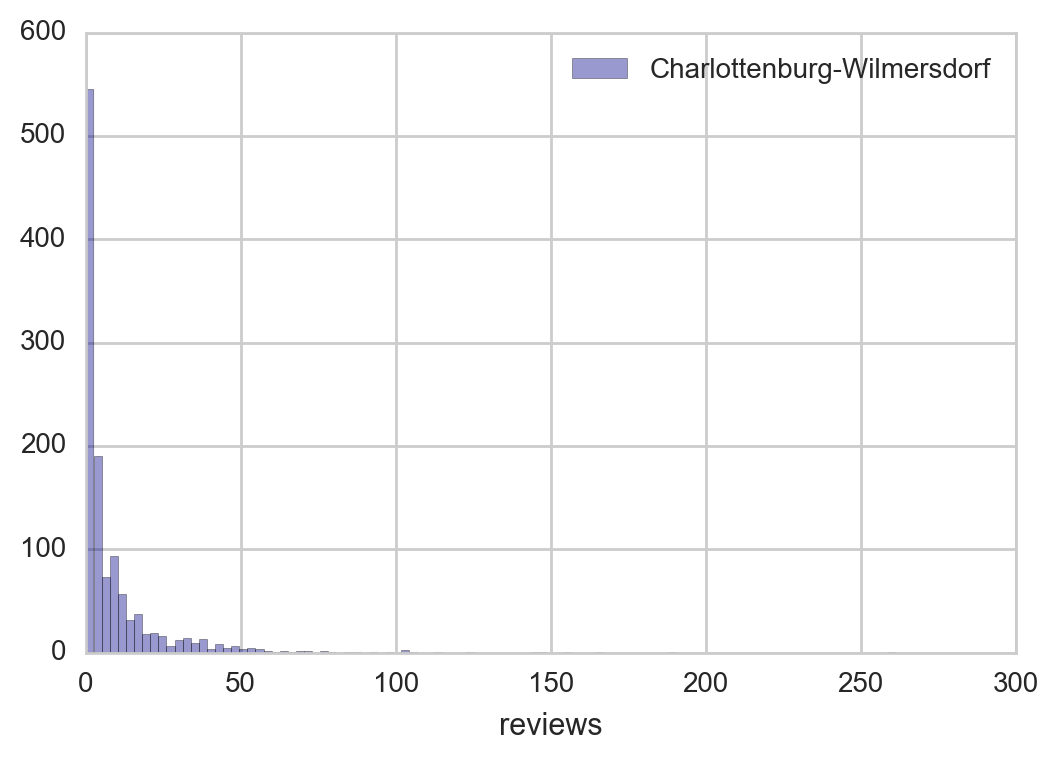

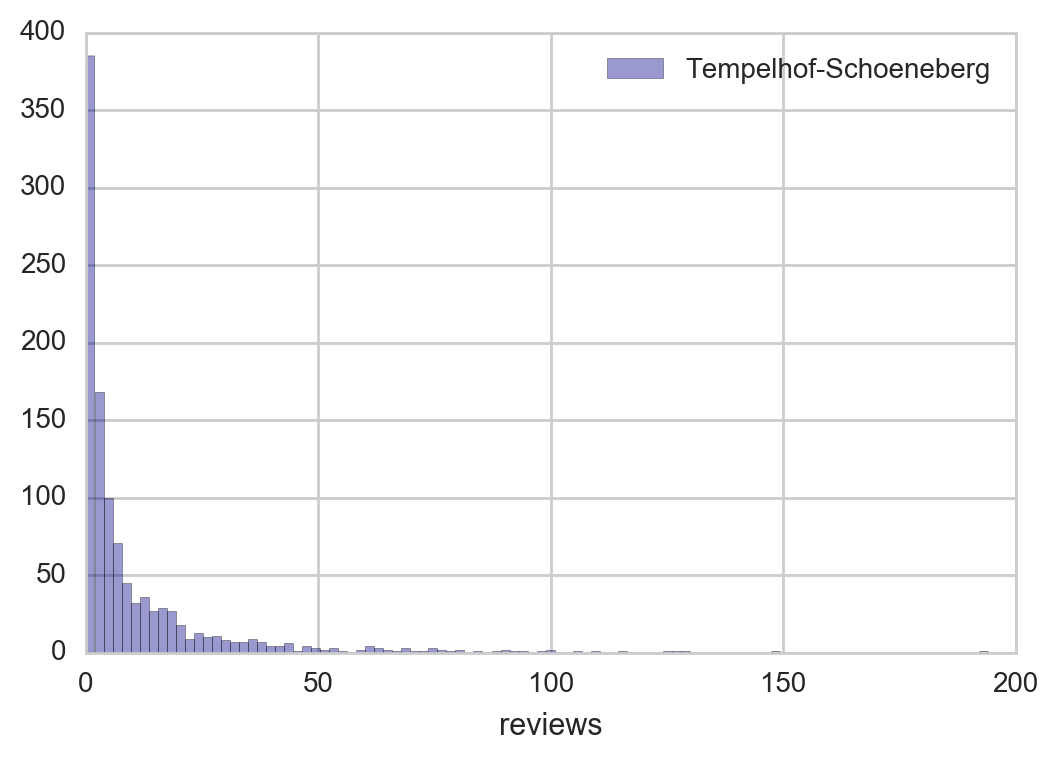

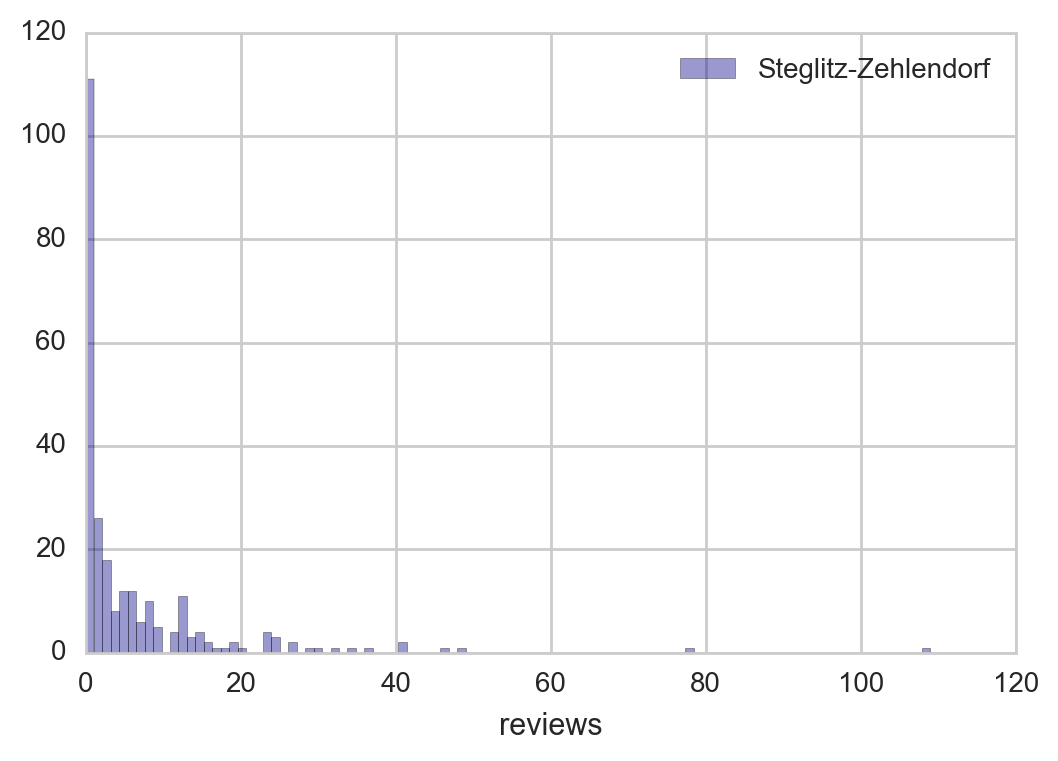

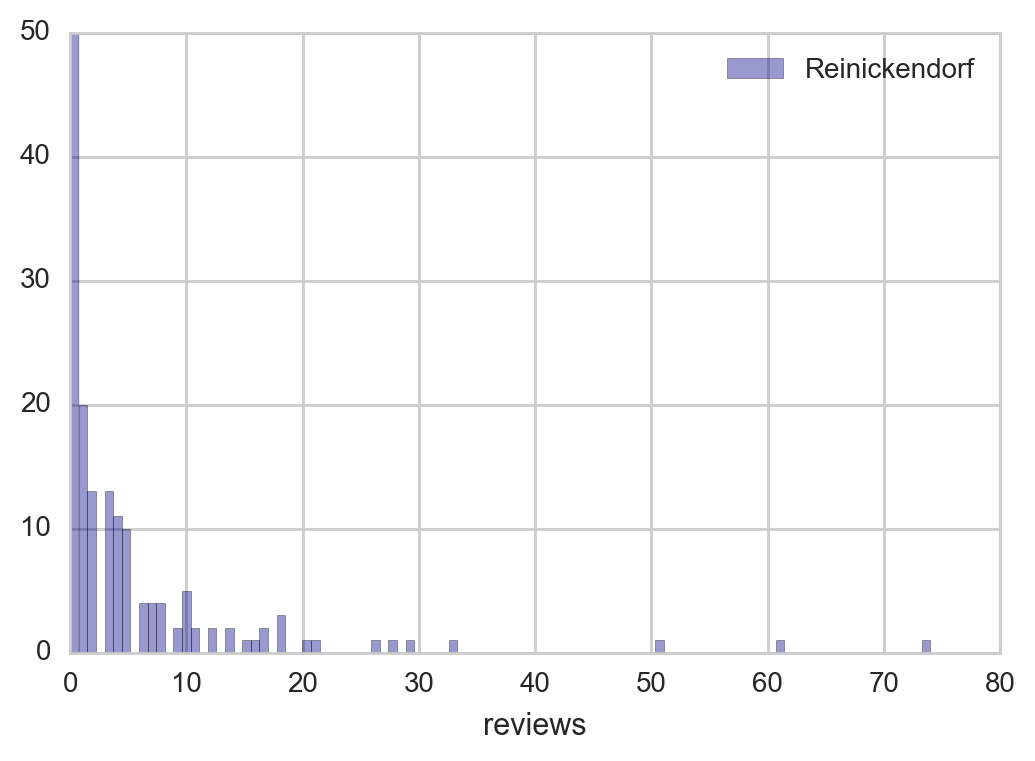

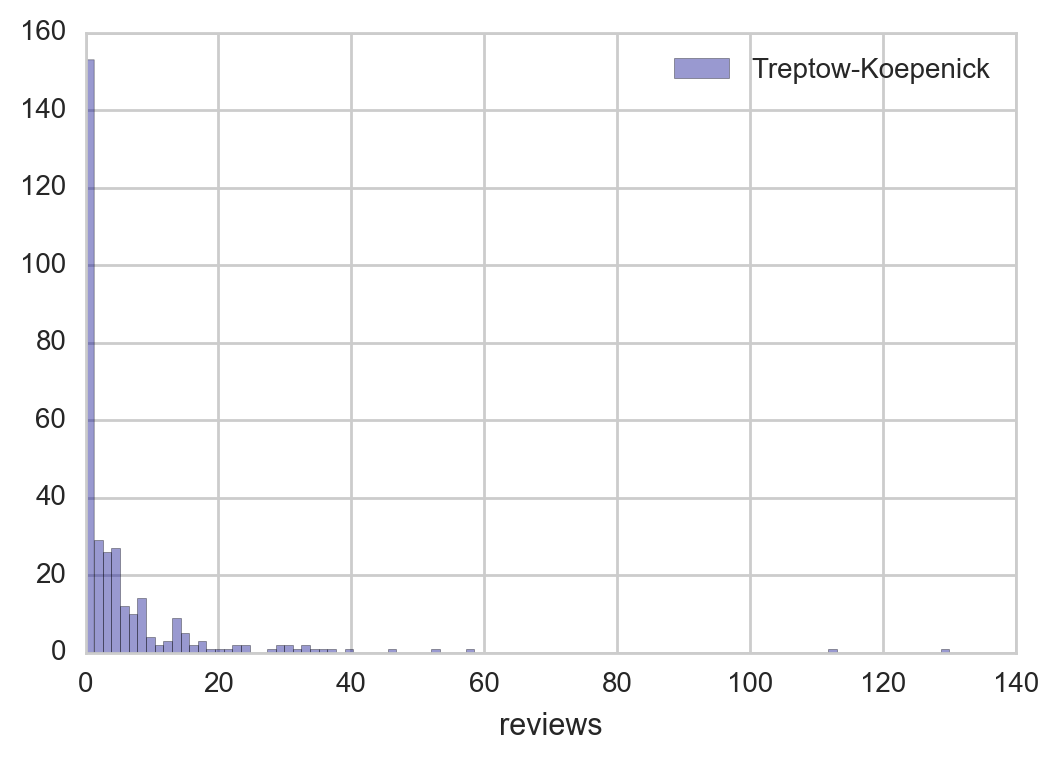

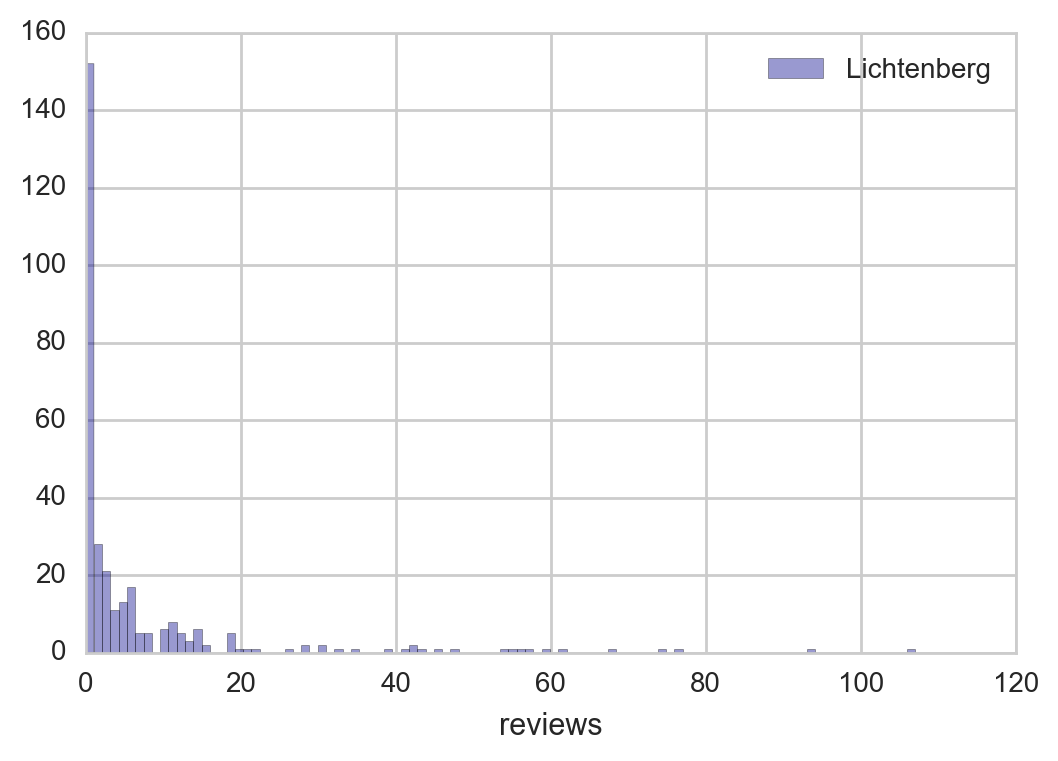

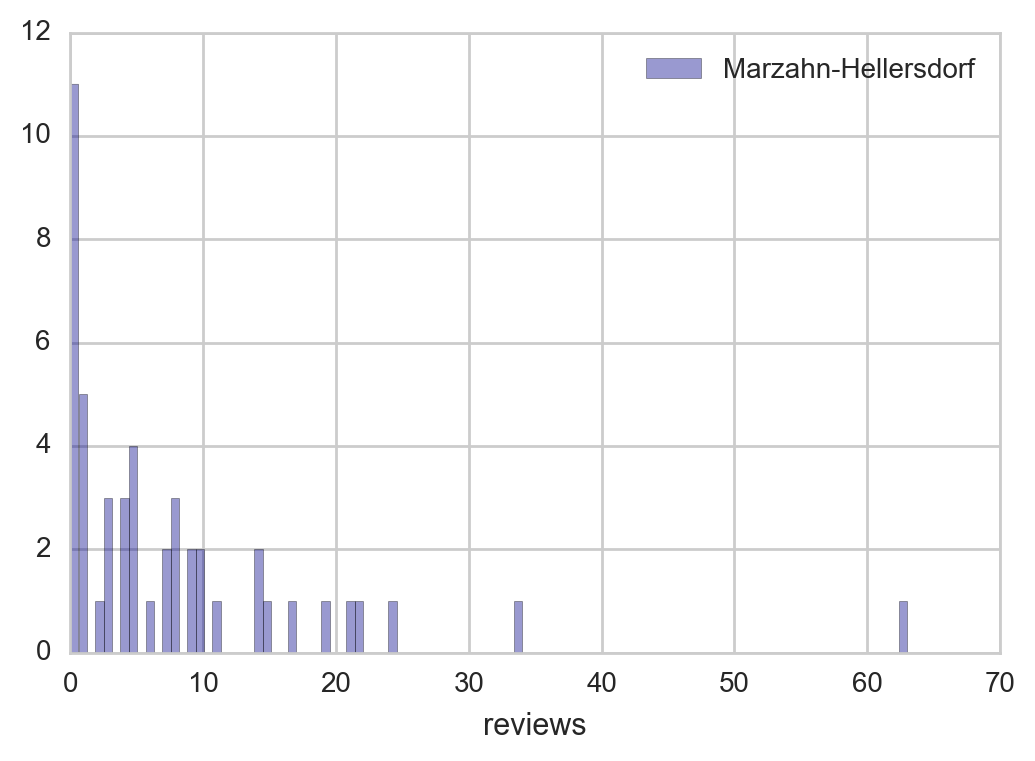

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(berlin.neighborhood.unique())):
    be = berlin[berlin.neighborhood == berlin.neighborhood.unique()[i]]
    
    ax = sns.distplot(be.reviews, color='darkblue', bins=100, kde=False, 
                      label = berlin.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 00])
    plt.show()

In [67]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(berlin.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [68]:
df1=df1.reset_index()

In [69]:
df1.sort_values('neighborhood', inplace = True)

In [70]:
df1 = df1.reset_index()

In [71]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,Charlottenburg-Wilmersdorf,11827,1200,74.538333
1,1,Friedrichshain-Kreuzberg,55259,3555,67.843319


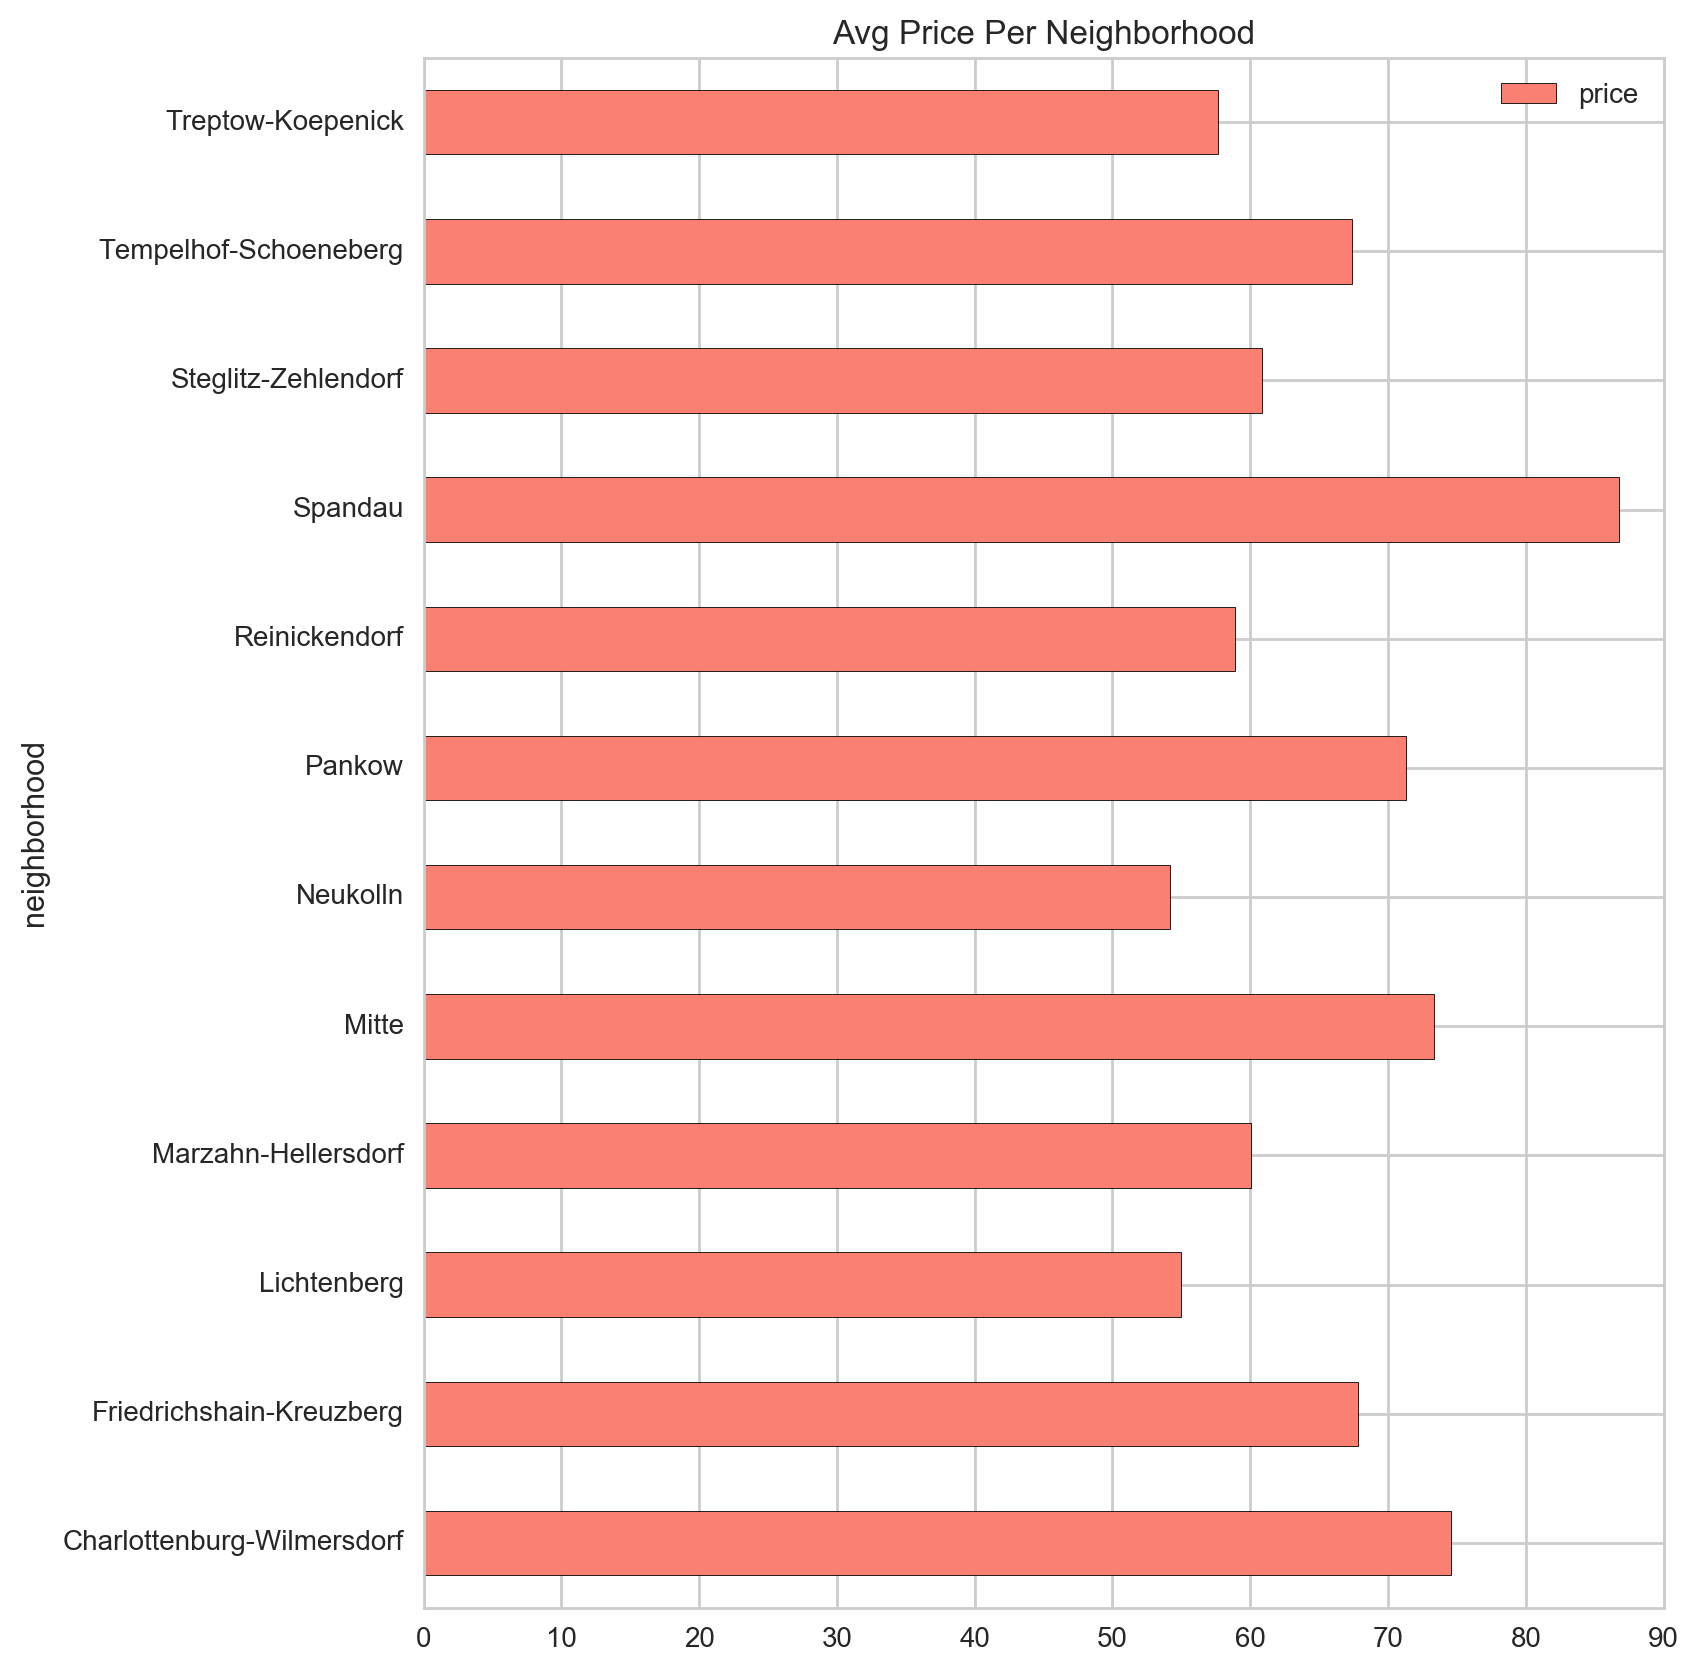

In [95]:
df1.plot(x='neighborhood', y='price', figsize=(8,10), kind = 'barh', title = 'Avg Price Per Neighborhood',
         color = 'salmon'
        )

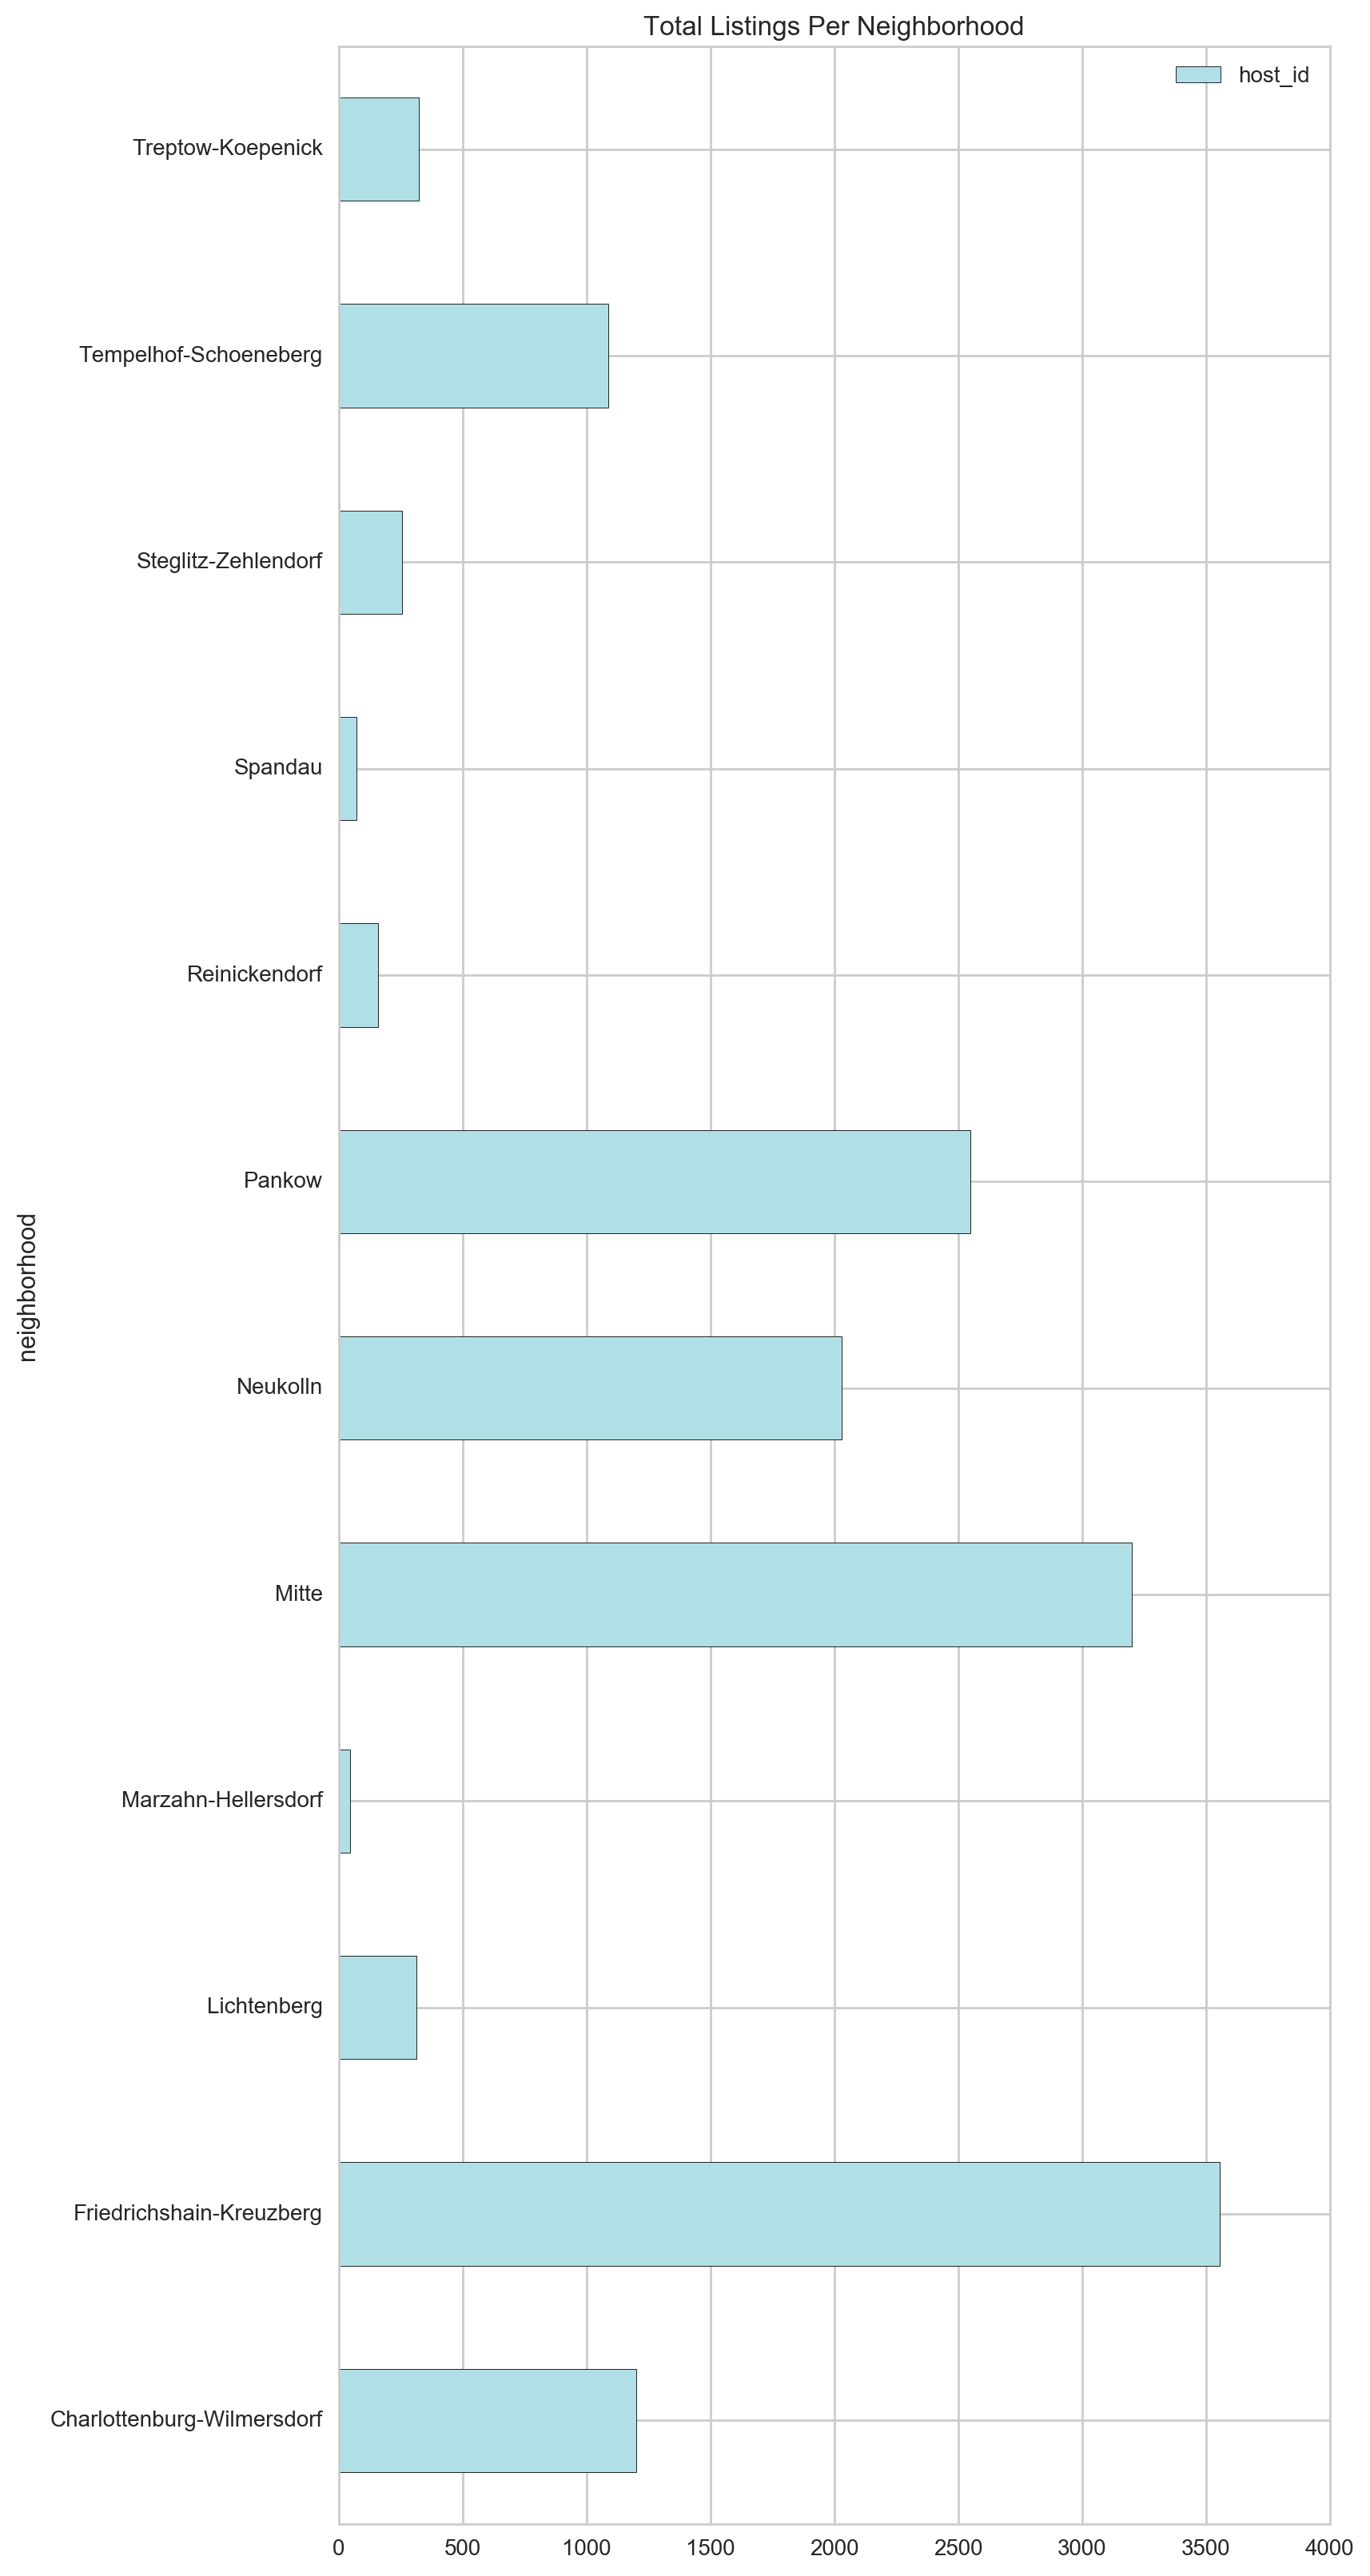

In [73]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,20), kind = 'barh',title = 'Total Listings Per Neighborhood',
         color = 'powderblue')

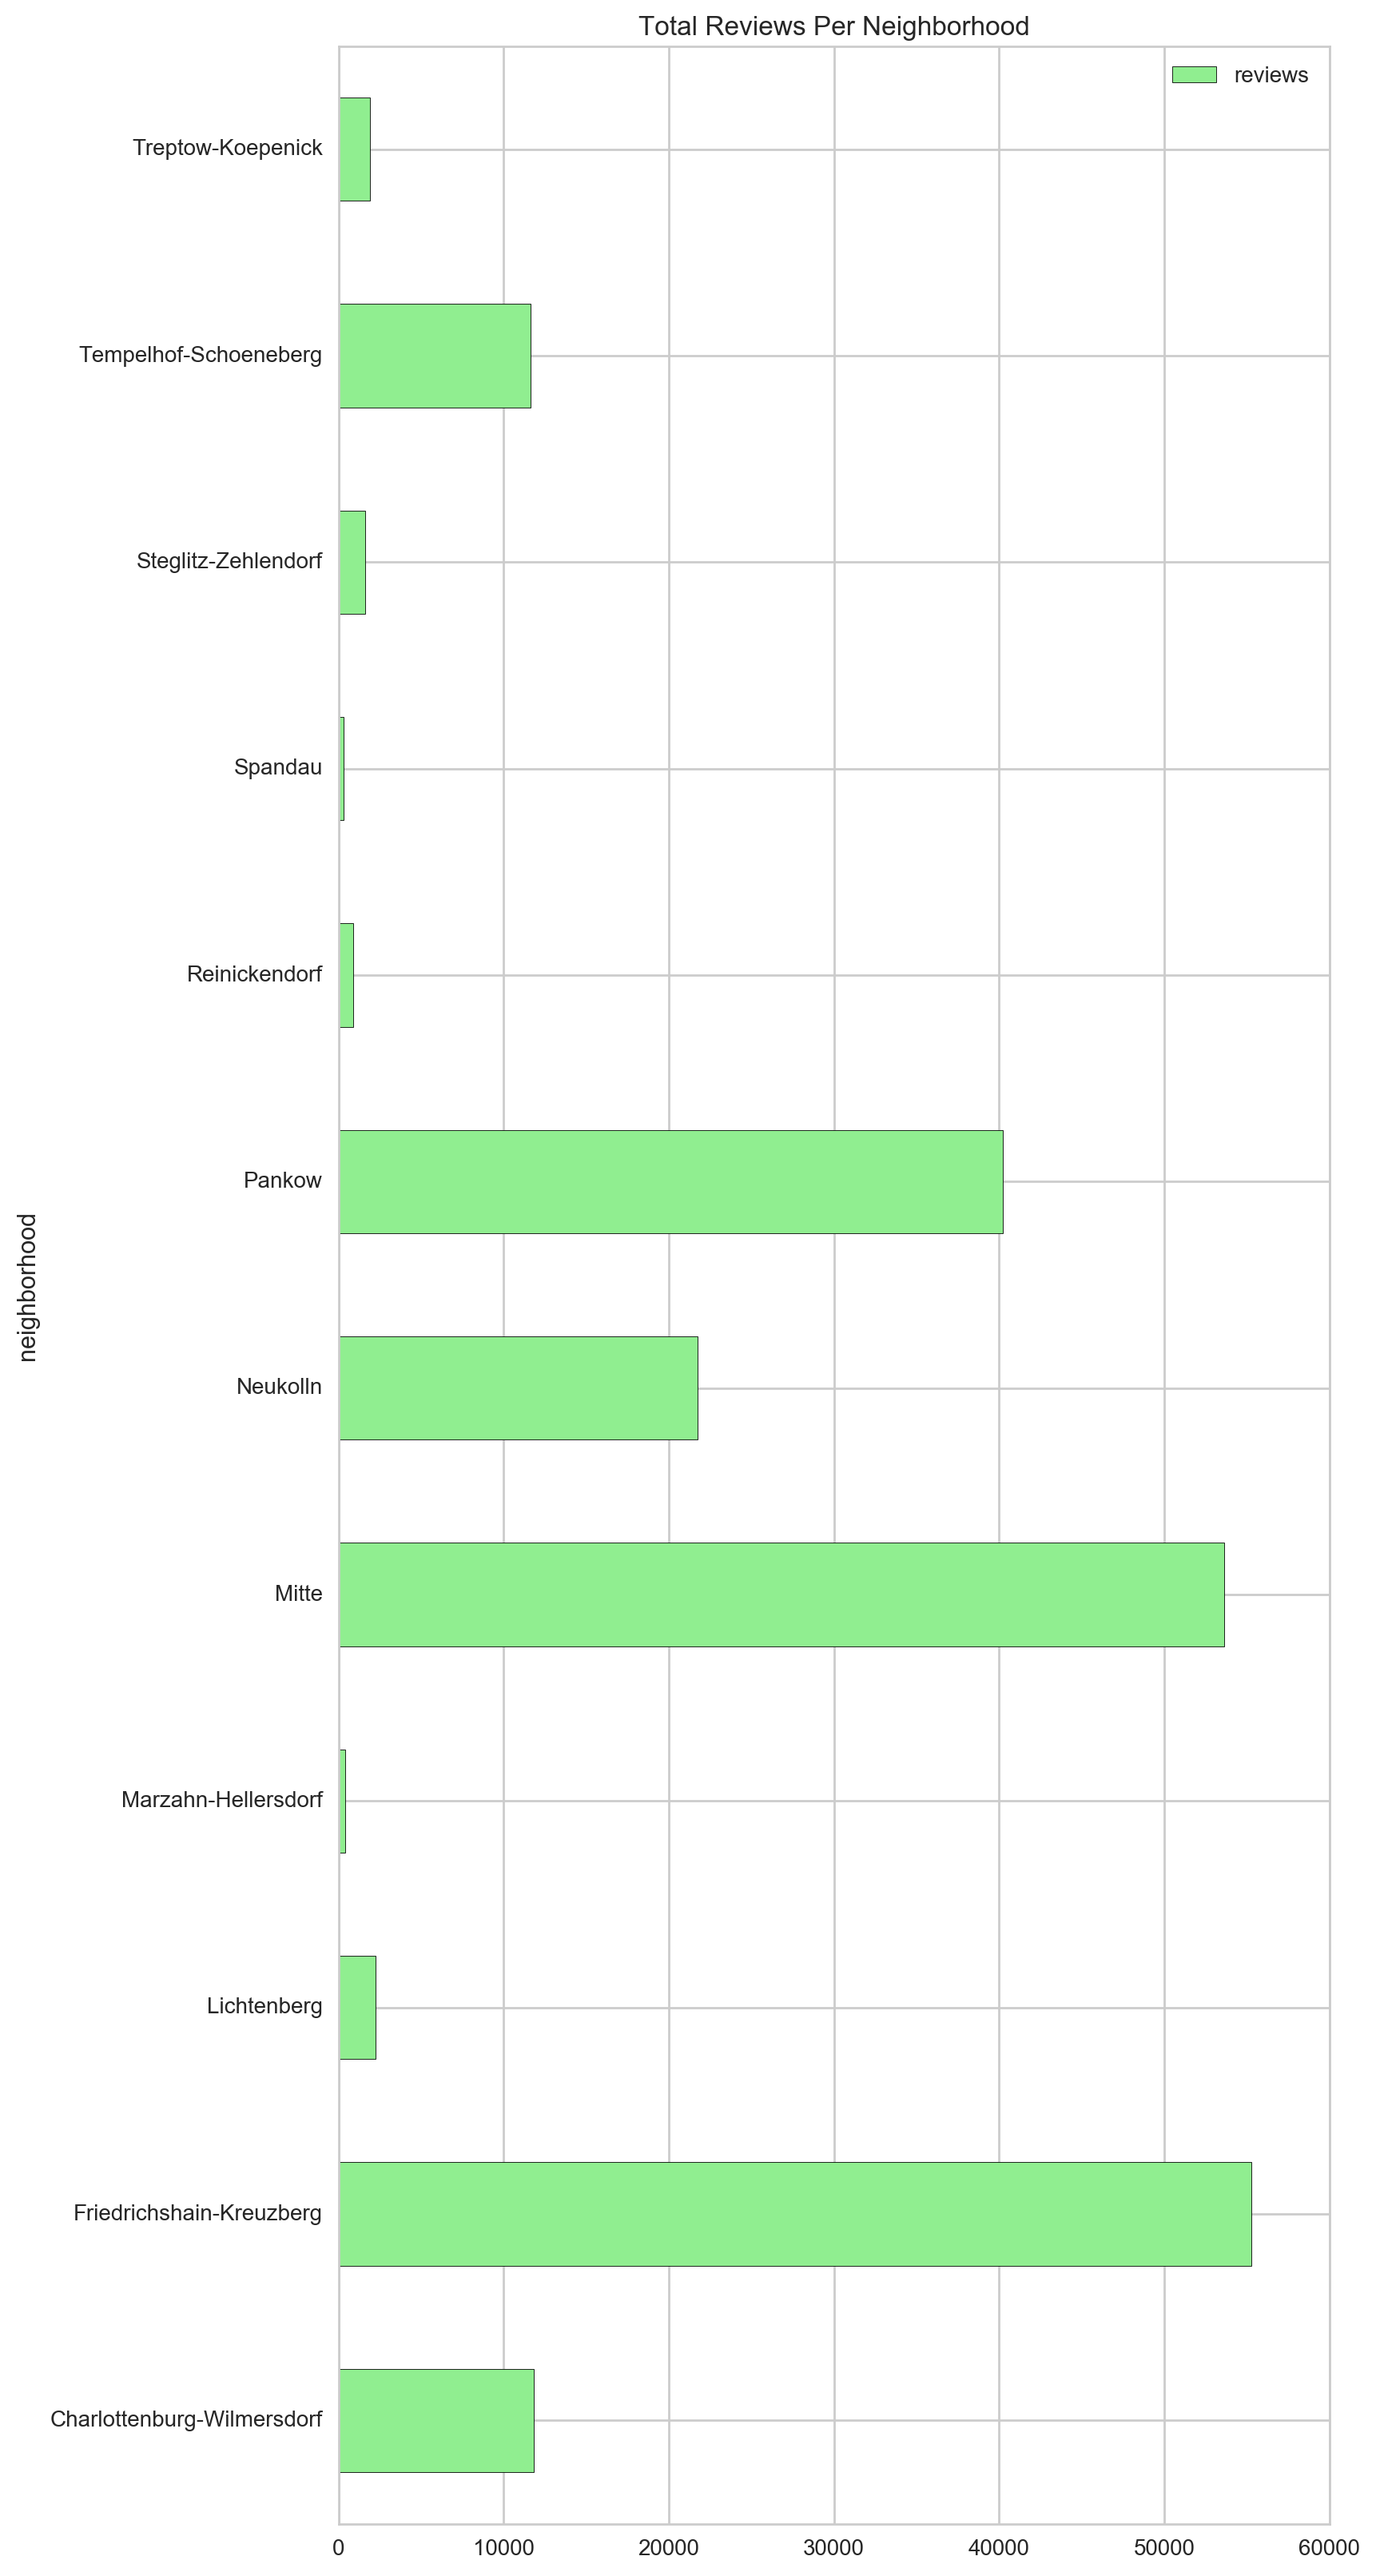

In [74]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,20), kind = 'barh',title = 'Total Reviews Per Neighborhood',
        color='lightgreen')

In [75]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(berlin.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [76]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [77]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Charlottenburg-Wilmersdorf,7842,809,88.687268
1,Private room,Charlottenburg-Wilmersdorf,3911,374,45.831551


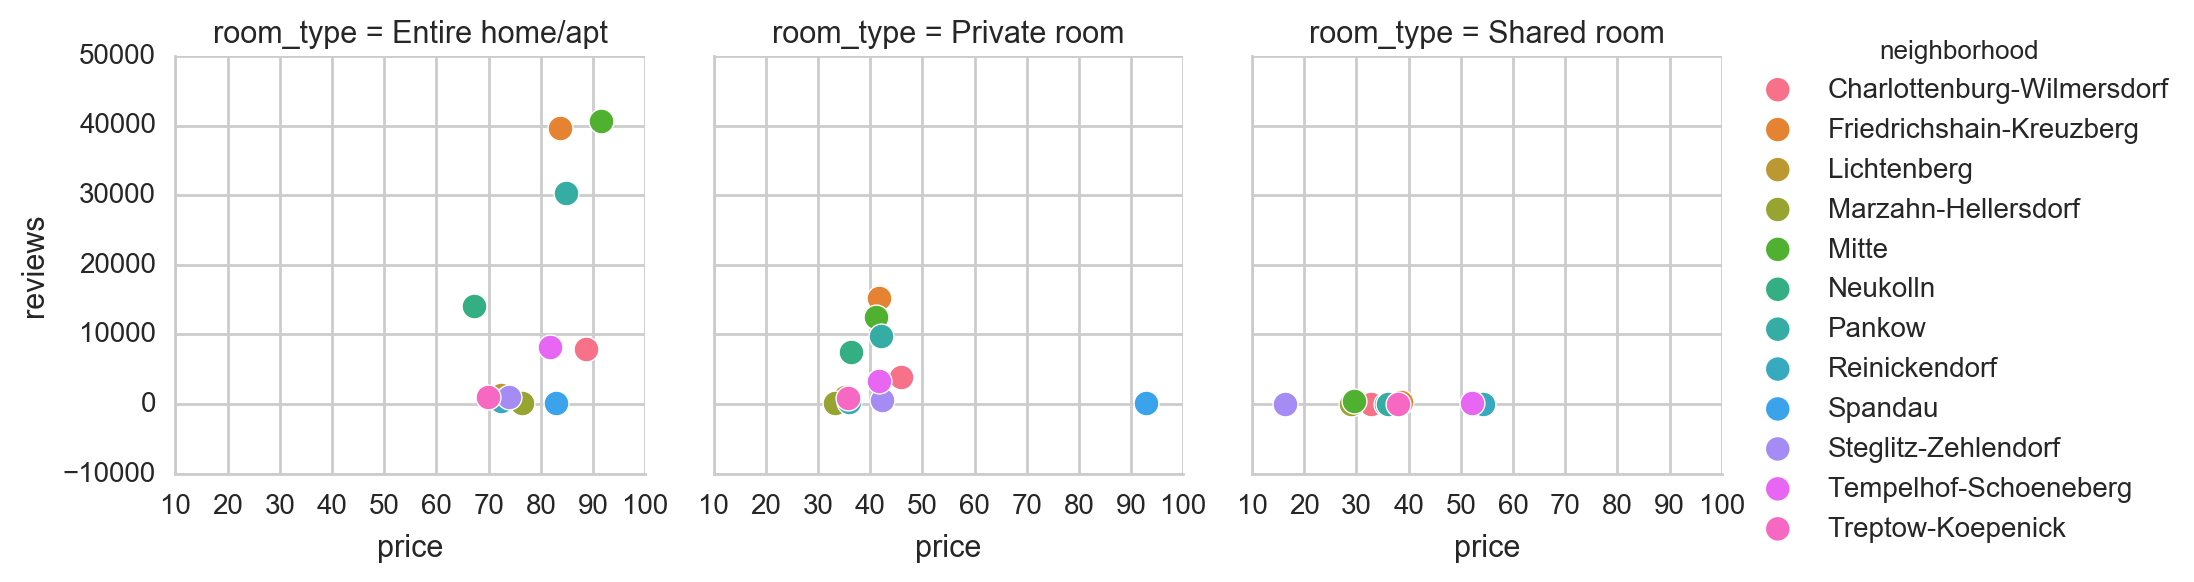

In [78]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","reviews", edgecolor="w", **kws).add_legend())

In [79]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(berlin.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [80]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [81]:
df3.reset_index(inplace=True)

In [82]:
df3.head(2)

,neighborhood,room_type,bedrooms,price,bedroom_count
0,Charlottenburg-Wilmersdorf,Entire home/apt,0.0,70.445946,74
1,Charlottenburg-Wilmersdorf,Entire home/apt,1.0,72.200409,489


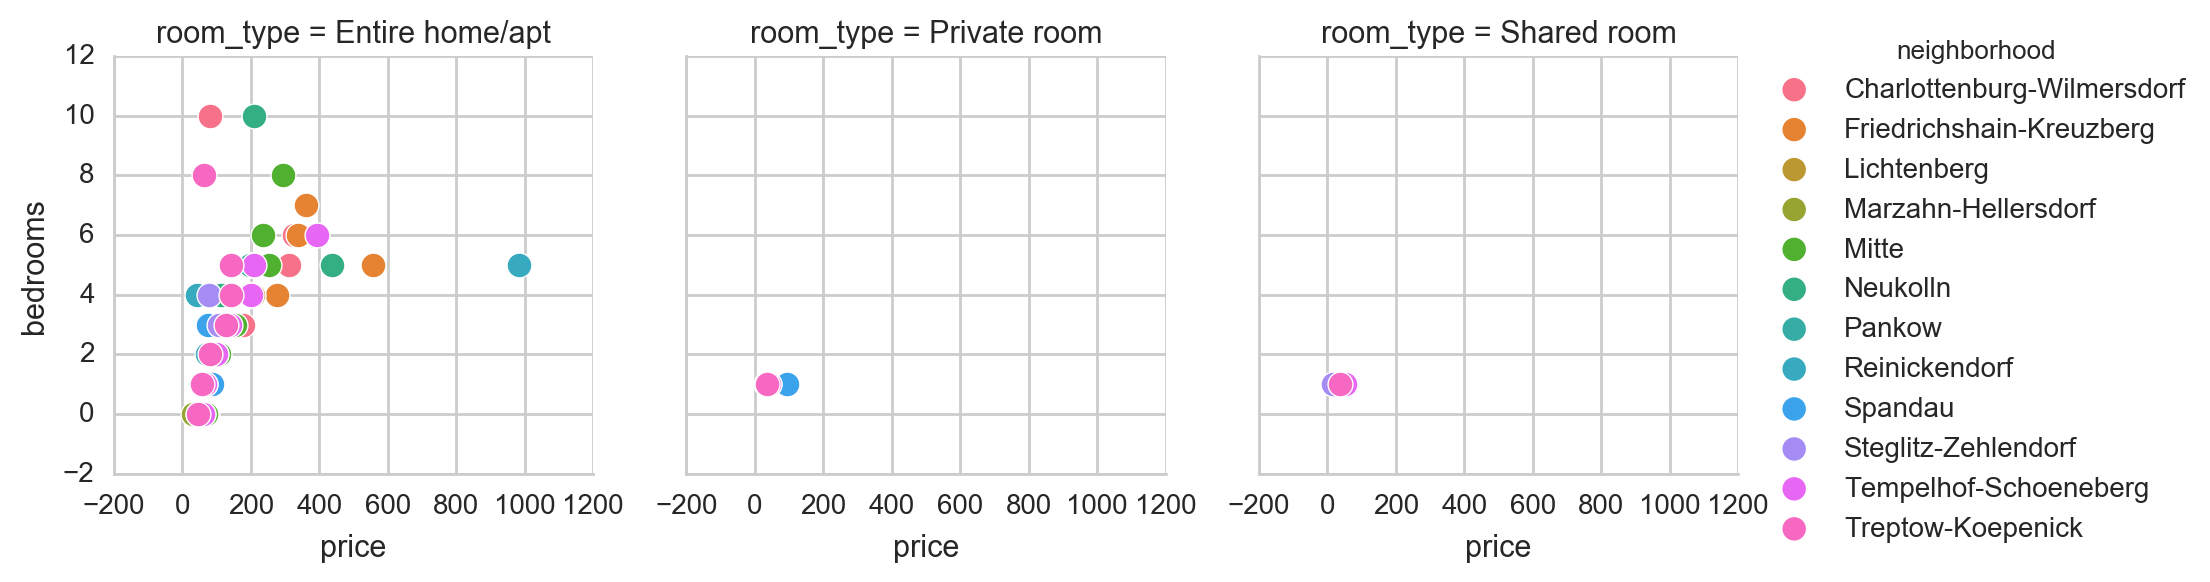

In [83]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","bedrooms", edgecolor="w", **kws).add_legend())

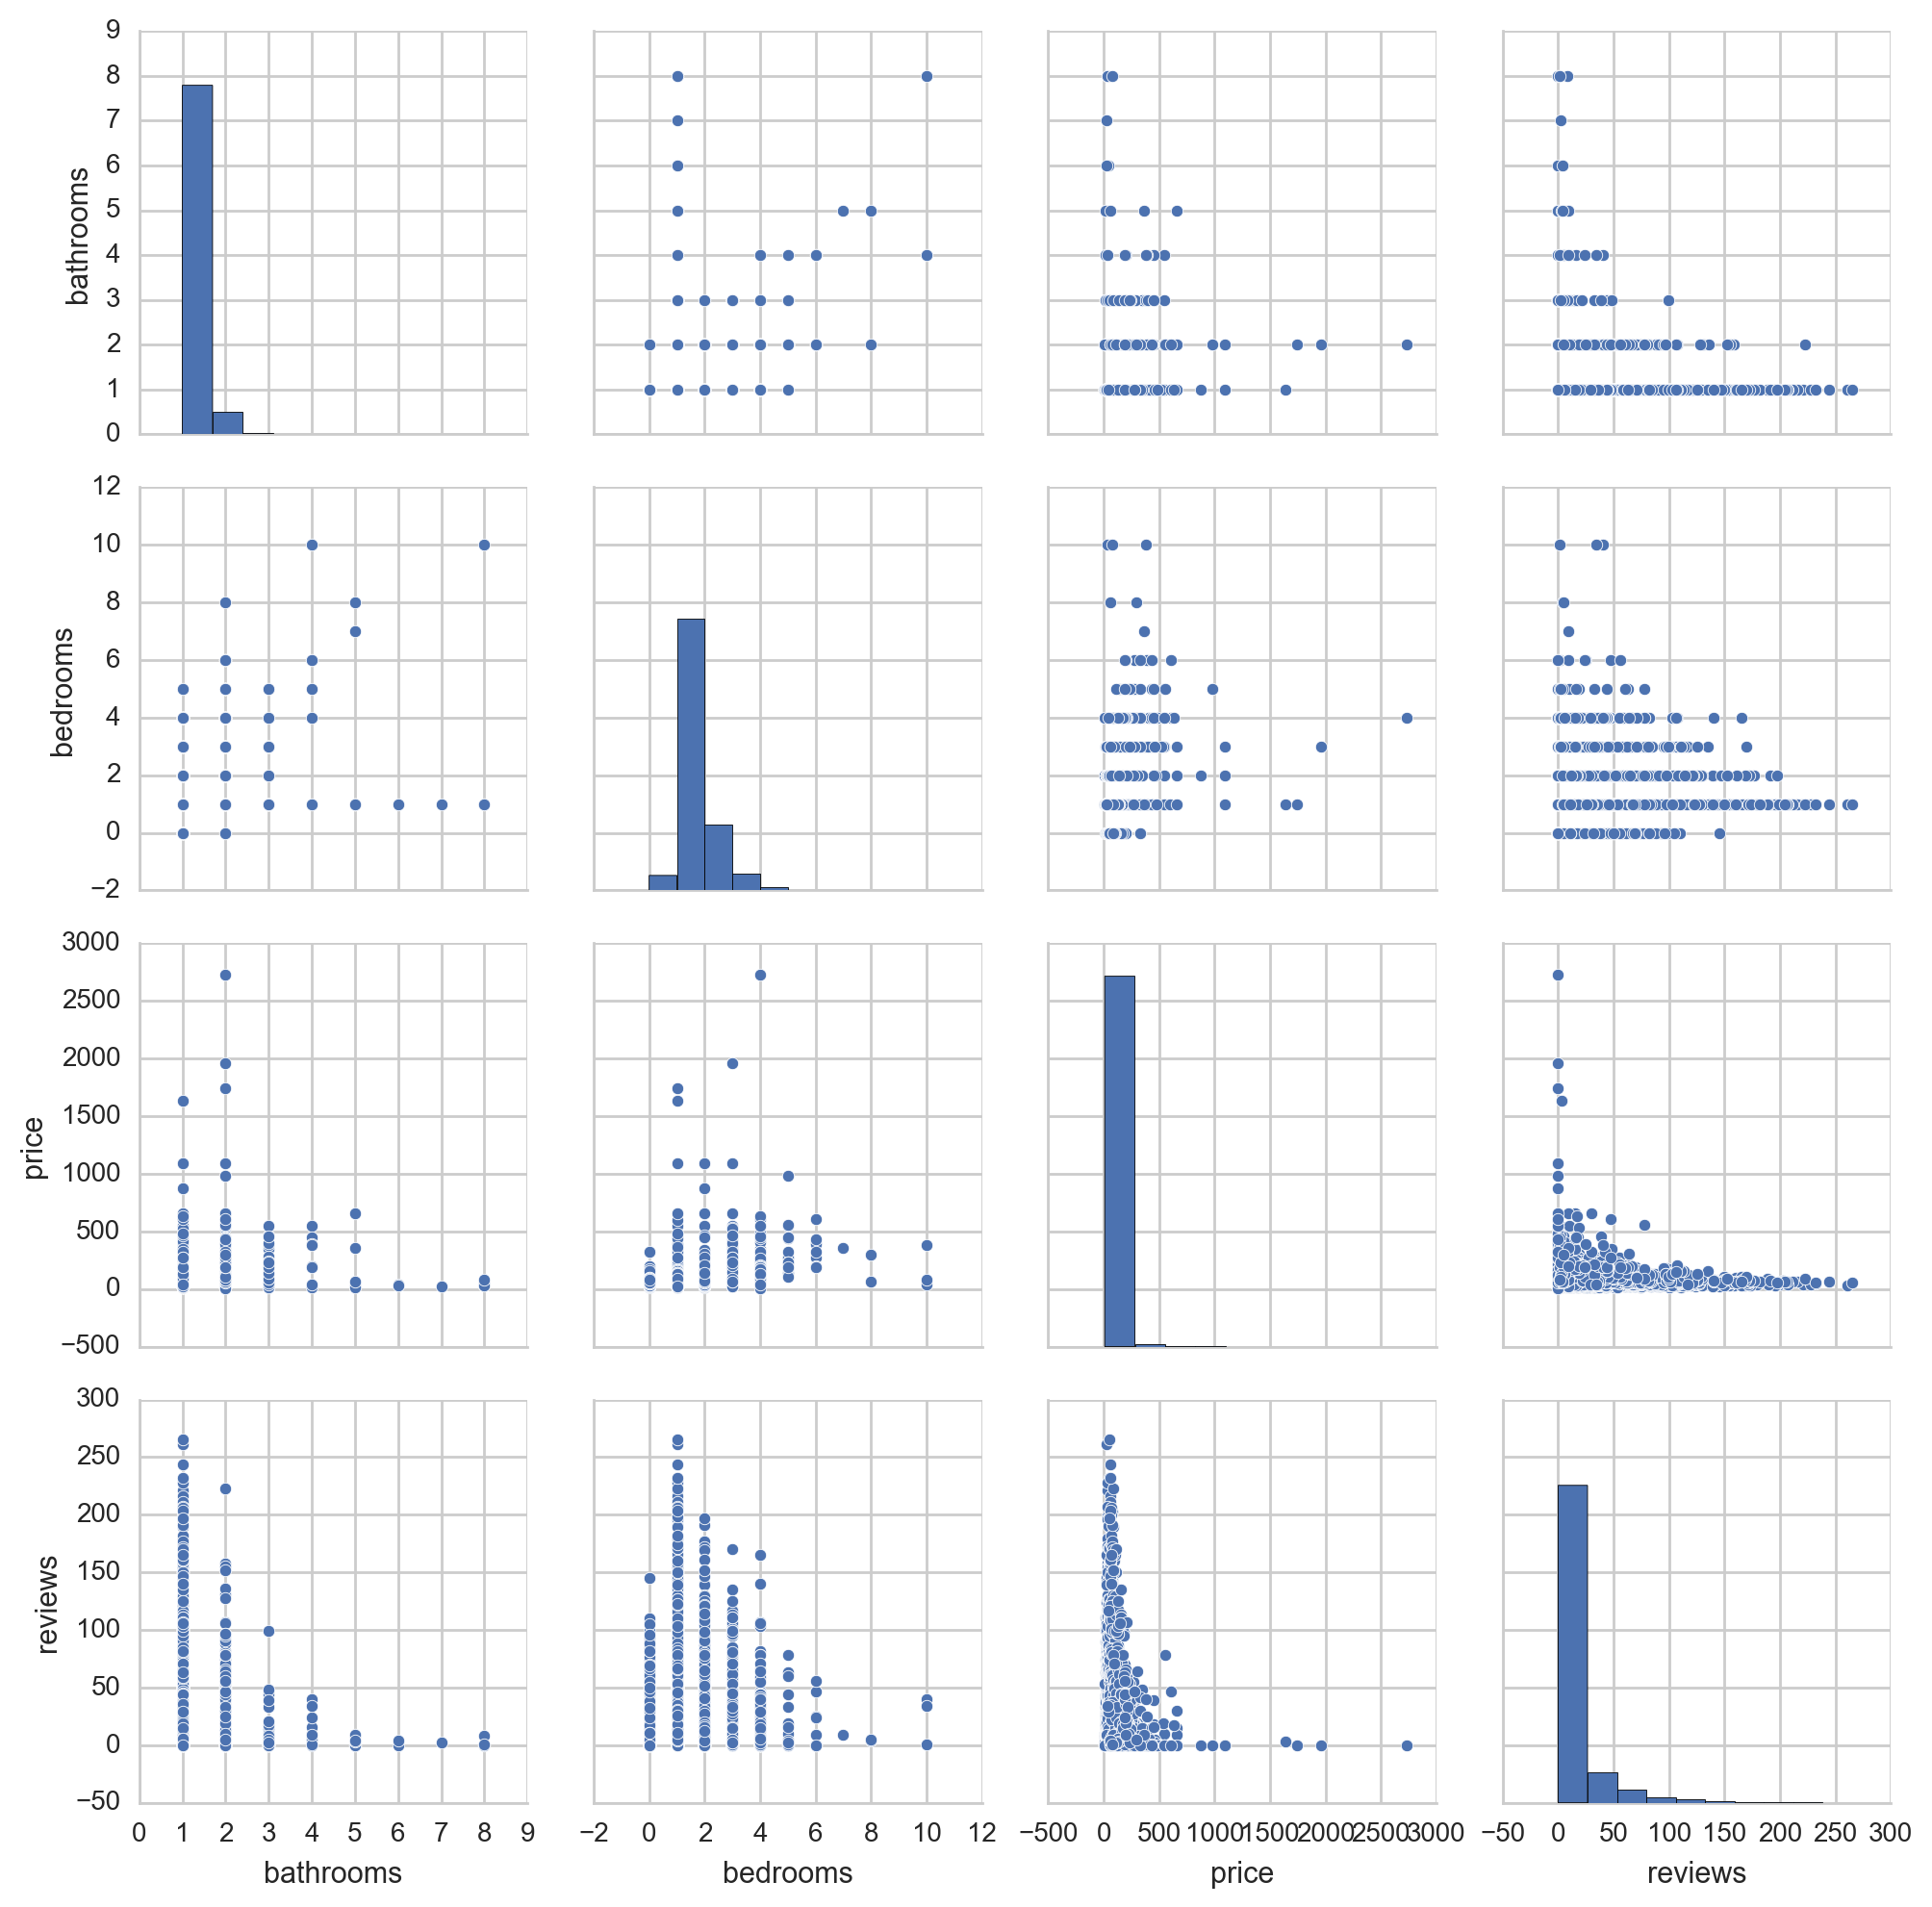

In [84]:
sns.pairplot(berlin[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
                 diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
                 grid_kws=None)

In [85]:
df4_corr = berlin[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

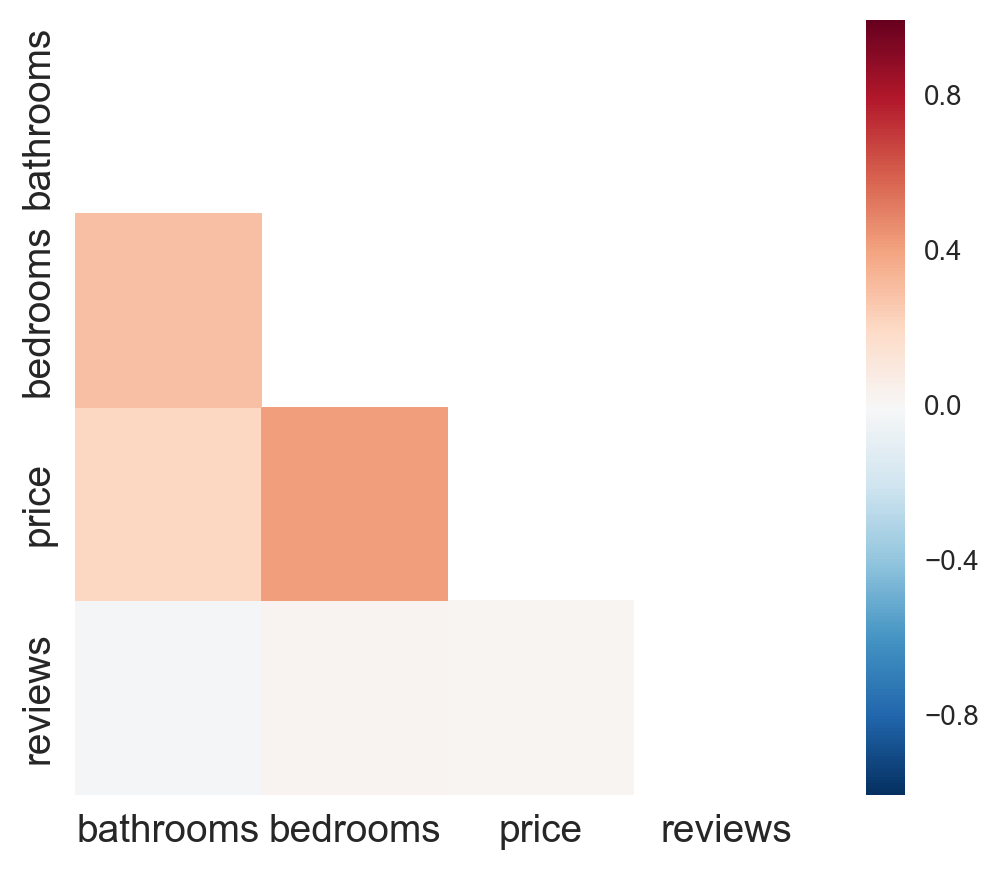

In [86]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

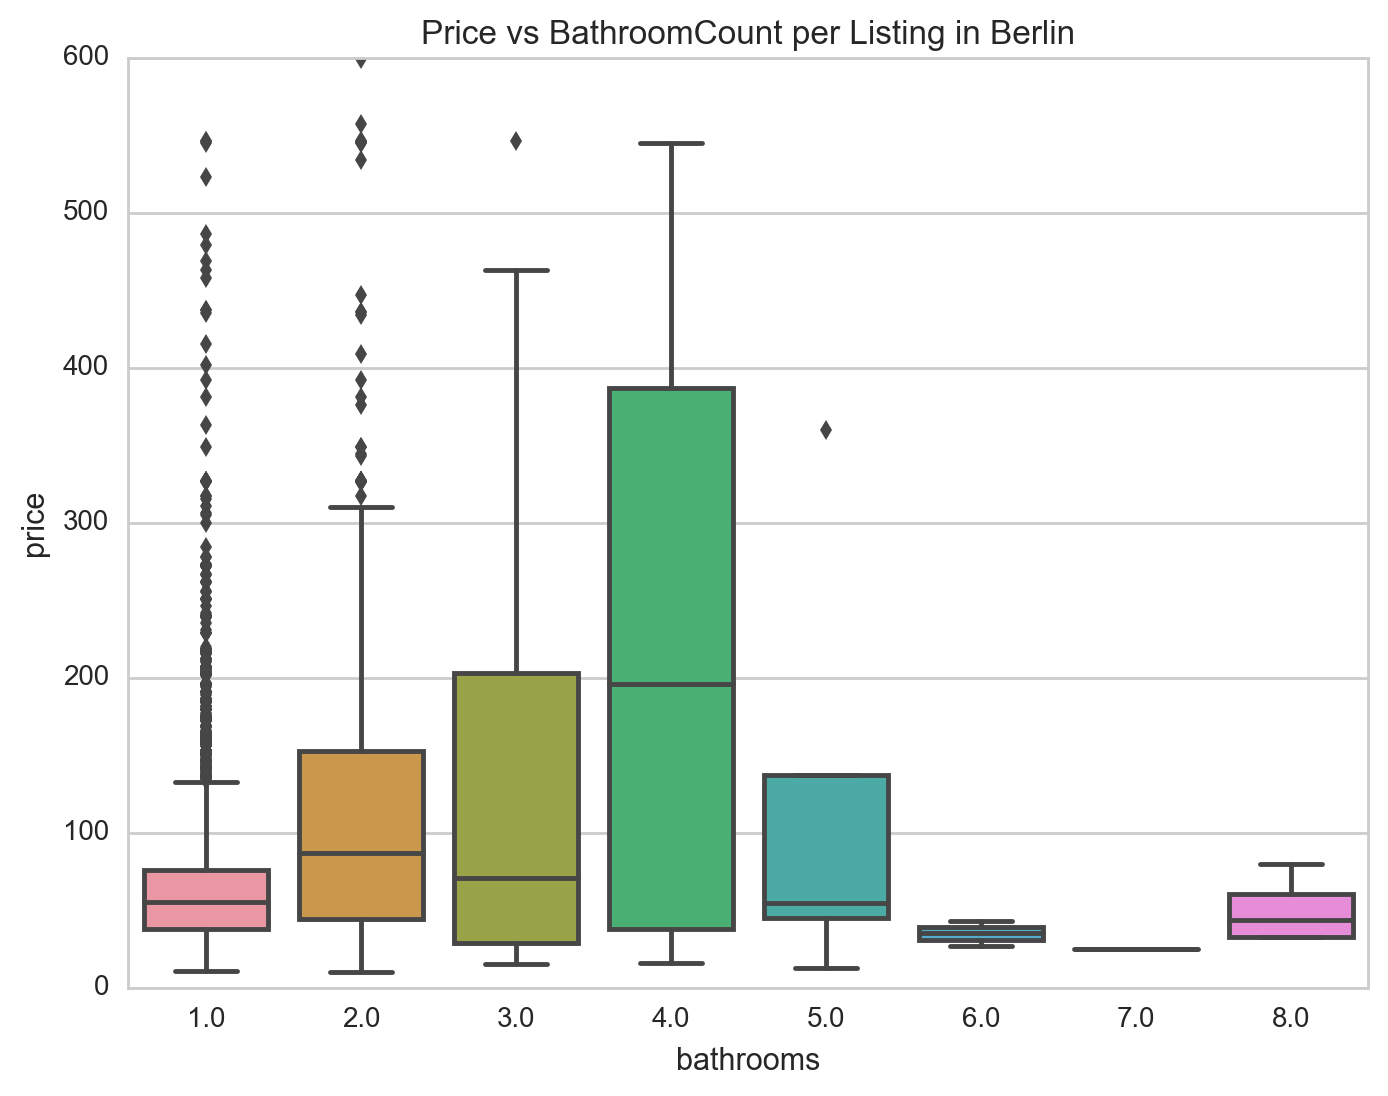

In [38]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bathrooms',y='price',data=berlin)
ax.set_ylim([0,600])
ax.set_title("Price vs BathroomCount per Listing in Berlin")

In [88]:
berlin.index[berlin.price == berlin.price.max()]

Int64Index([14677], dtype='int64')

In [89]:
berlin.ix[14677,:]

level_0                                       4397
room_id                                    2134104
host_id                                5.87323e+06
room_type                          Entire home/apt
neighborhood              Friedrichshain-Kreuzberg
reviews                                          0
overall_satisfaction                             2
accommodates                                   NaN
bedrooms                                         4
bathrooms                                        2
price                                         2729
minstay                                          5
latitude                                   52.4879
longitude                                  13.3835
collected               2015-12-02 20:30:11.443932
Name: 14677, dtype: object

In [90]:
#berlin.drop(berlin.index[[14677]],inplace=True)

In [91]:
#berlin = berlin.reset_index()

In [39]:
berlin.shape

(14797, 15)

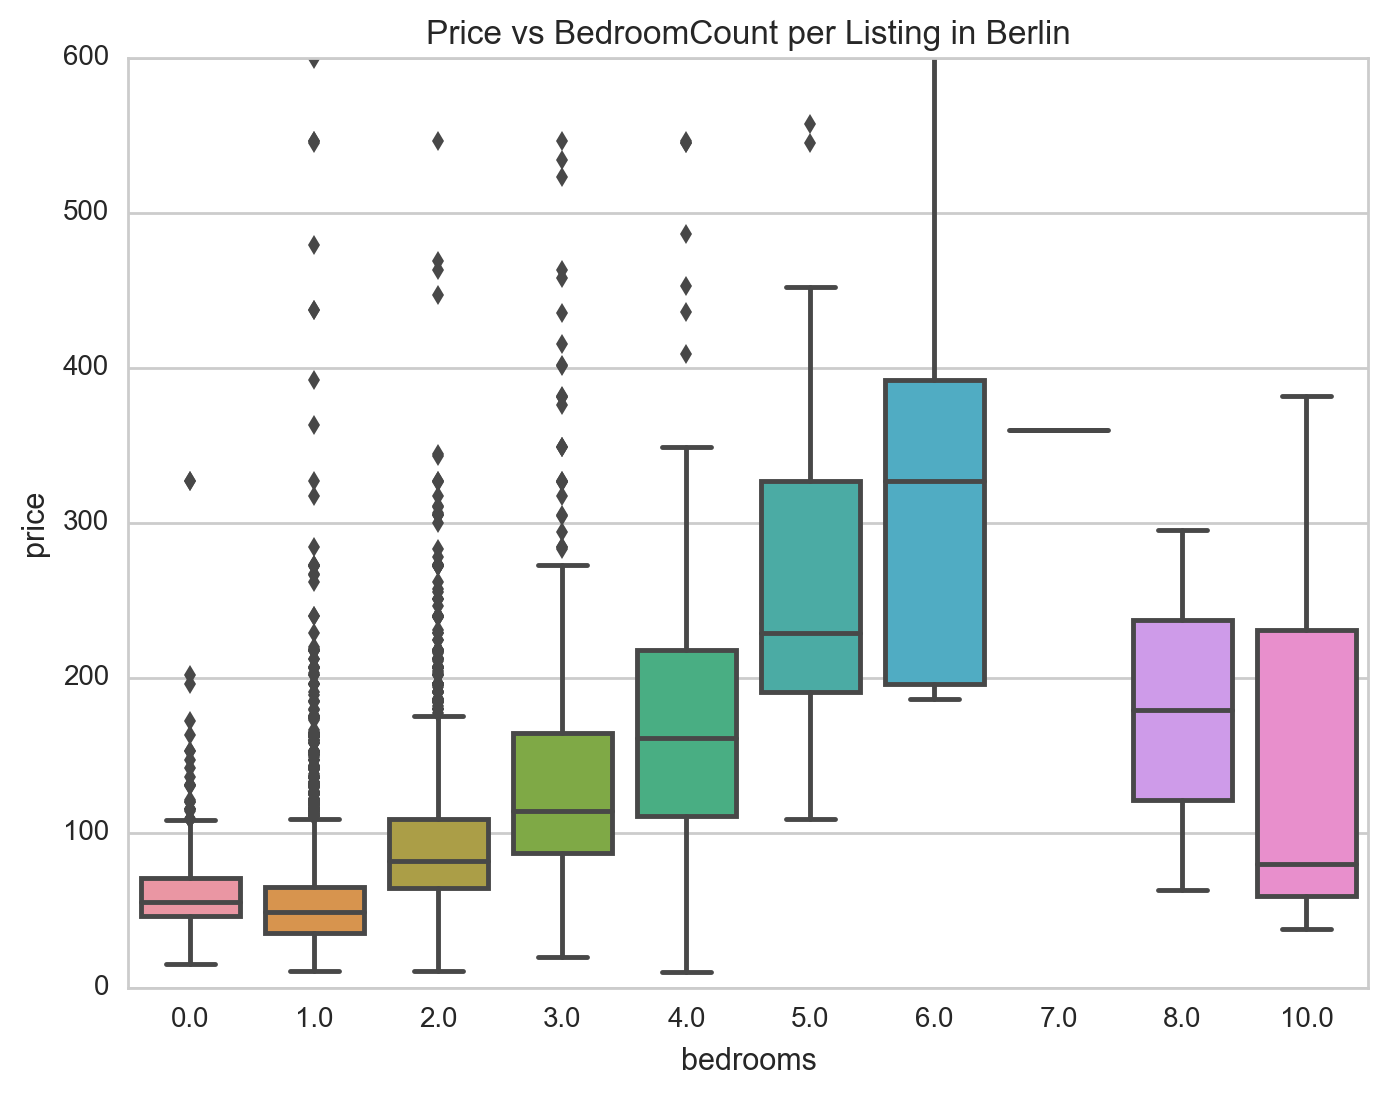

In [42]:

fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bedrooms',y='price',data=berlin, orient='v',)
ax.set_ylim([0,600])

ax.set_title("Price vs BedroomCount per Listing in Berlin")

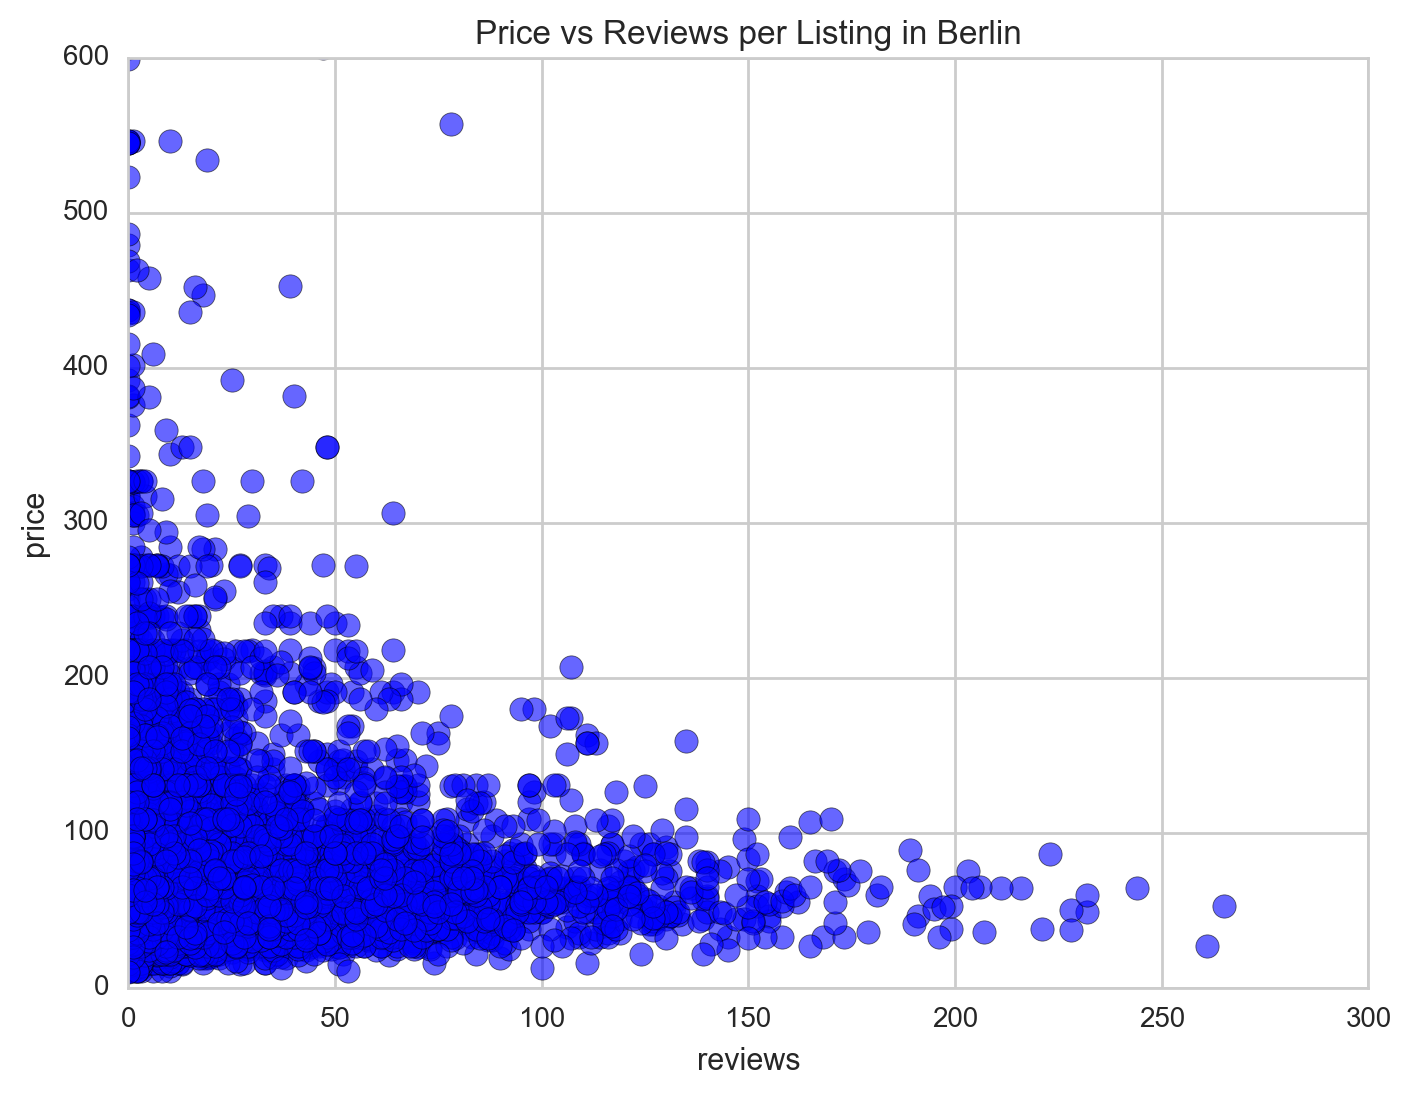

In [45]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(x= berlin.reviews ,y= berlin.price, s=70, alpha=0.6)
ax.set_ylim([0,600])
ax.set_xlim([0,300])

ax.set_ylabel("price")
ax.set_xlabel("reviews")

ax.set_title("Price vs Reviews per Listing in Berlin")